# Brain Observatory
This notebook documents some classes and functions in the AllenSDK that help manipulate files and data structures in the Allen Brain Observatory.  The main entry point in the `BrainObservatoryCache` class.  This class is responsible for downloading any requested data or metadata on request and storing it in well known locations.

Download this file in .ipynb format <a href='brain_observatory.ipynb'>here</a>.

## Experiment Containers
The experiment container describes a set of experiments performed with the same targeted area, imaging depth, and Cre line.  The `BrainObservatoryCache` has a number of functions for figuring out what experiment containers are available at the moment.

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.
boc = BrainObservatoryCache(manifest_file='/media/ysweeney/HDD/ABI_data/boc/manifest.json')


# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures))

all targeted structures: [u'VISal', u'VISl', u'VISp', u'VISpm']


In [2]:
import numpy as np 
import numpy
import scipy
from matplotlib import pyplot as plt
from scipy import stats
import pandas
 
def partial_corr(x,y,z,plot=True,color='b',xlabel='x',ylabel='y ',title='network'):
    beta_i = stats.linregress(z, x)
    beta_j = stats.linregress(z, y)
    
    line_x = beta_i[1] + np.multiply(beta_i[0],z)
    line_y =  beta_j[1] + np.multiply(beta_j[0],z)
            
    #print beta_i,beta_j
        
    #plt.scatter(x,line_x)
    #plt.scatter(y,line_y,color='r')

    res_j = np.subtract(y,line_y)
    res_i = np.subtract(x,line_x)

    corr = stats.spearmanr(res_i, res_j)
    print 'partial correlation', corr
    
    if plot:
        fig,axes=plt.subplots()
        plt.scatter(res_j,res_i,color=color)
        plt.title('Residuals ,' + title + ' ; ' + str(corr[0])+ ' ' + str(corr[1]))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    

In [34]:
# Download experiment containers for VISp experiments
visp_ecs = boc.get_experiment_containers(targeted_structures=['VISal'])
print("all VISp experiment containers: %d" % len(visp_ecs))

visp_ecs

all VISp experiment containers: 17


[{'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222425',
  'failed': False,
  'id': 511510695,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222425',
  'tags': [],
  'targeted_structure': u'VISal'},
 {'cre_line': u'Cux2-CreERT2',
  'donor_name': u'225036',
  'failed': False,
  'id': 511510797,
  'imaging_depth': 175,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-225036',
  'tags': [],
  'targeted_structure': u'VISal'},
 {'cre_line': u'Cux2-CreERT2',
  'donor_name': u'228379',
  'failed': False,
  'id': 511510867,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-228379',
  'tags': [],
  'targeted_structure': u'VISal'},
 {'cre_line': u'Cux2-CreERT2',
  'donor_name': u'228378',
  'failed': False,
  'id': 511511052,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'specimen_name': u'Cux2-Cr

In [29]:
boc.get_all_targeted_structures()

[u'VISal', u'VISl', u'VISp', u'VISpm']

In [4]:
# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print("all imaging depths: " + str(depths))

all imaging depths: [175, 250, 275, 335, 350, 375]


In [28]:
# Download a list of all stimuli
stims = boc.get_all_stimuli()
print("all stimuli:\n")
pprint.pprint(stims)

all stimuli:

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']


In [20]:
# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print("all cre lines:\n")
pprint.pprint(cre_lines)

all cre lines:

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Nr5a1-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre']


In [27]:
# Download experiment containers for Cux2 experiments
cux2_ecs = boc.get_experiment_containers(cre_lines=['Cux2-CreERT2'])
print("Cux2 experiments: %d\n" % len(cux2_ecs))

print("Example experiment container record:")
pprint.pprint(cux2_ecs[1])

Cux2 experiments: 46

Example experiment container record:
{'cre_line': u'Cux2-CreERT2',
 'donor_name': u'222426',
 'failed': False,
 'id': 511510736,
 'imaging_depth': 175,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'tags': [],
 'targeted_structure': u'VISp'}


## Download Experiments for a Container
An experiment container is a group of experiments.  Each experiment has a different stimulus protocol.  For example, one experiment protocol contains the static gratings stimulus and another has the natural scenes stimulus.  The `BrainObservatoryCache` helps you find out which experiment associated with a container has the stimuli you are interested in.  First, let's see what experiments are available for a single container.

In [9]:
# Find all of the experiments for an experiment container
cux2_ec_id = cux2_ecs[10]['id']
exps = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id])
print("Experiments for experiment_container_id %d: %d\n" % (cux2_ec_id, len(exps)))
pprint.pprint(exps)

Experiments for experiment_container_id 511510667: 3

[{'acquisition_age_days': None,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222420',
  'experiment_container_id': 511510667,
  'id': 501574836,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222420',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': None,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222420',
  'experiment_container_id': 511510667,
  'id': 501773889,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222420',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': None,
  'cre_line': u'Cux2-CreERT2',
  'donor_name': u'222420',
  'experiment_container_id': 511510667,
  'id': 501498760,
  'imaging_depth': 275,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
 

The `session_type` field indicates which experimental protocol was used.  If you just want to find which experiment contains the static gratings stimulus, you can do the following:

In [45]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
#cux2_ec_id = cux2_ecs[8]['id']
#exp = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id], 
#                                stimuli=[stim_info.STATIC_GRATINGS])[0]
#print("Experiment with static gratings:")
#pprint.pprint(exp)

cux2_ec_id = cux2_ecs[0]['id']
exp = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id], 
                                stimuli=[stim_info.STATIC_GRATINGS])
print("Experiment with spontaneous activity:")
pprint.pprint(exp[0])

Experiment with spontaneous activity:
{'acquisition_age_days': None,
 'cre_line': u'Cux2-CreERT2',
 'donor_name': u'222425',
 'experiment_container_id': 511510695,
 'id': 503820068,
 'imaging_depth': 175,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'session_type': u'three_session_B',
 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222425',
 'targeted_structure': u'VISal'}


Now we can download the NWB file for this experiment.

In [22]:
exp = boc.get_ophys_experiment_data(exp['id'])

# print out the metadata available in the NWB file
pprint.pprint(exp.get_metadata())

NameError: name 'exp' is not defined

## Find Cells of Interest
Another way to look for data is to search for cells with interesting tuning properties.  We have pre-computed a set of cell metrics, including: 

stimulus          | metric                       | field name 
----------------- | ---------------------------- | ----------------
drifting gratings | orientation selectivity      | osi_dg 
                  | direction selectivity        | dsi_dg 
                  | preferred direction          | pref_dir_dg 
                  | preferred temporal frequency | pref_tf_dg 
                  | response p value             | p_dg 
static gratings   | orientation selectivity      | osi_sg 
                  | preferred orientation        | pref_ori_sg 
                  | preferred spatial frequency  | pref_sf_sg 
                  | preferred phase              | pref_phase_sg 
                  | mean time to peak response   | time_to_peak_sg 
                  | response p value             | p_sg 
natural scenes    | mean time to peak response   | time_to_peak_ns 
                  | preferred scene index        | pref_scene_ns 
                  | response p value             | p_ns 

You can use these properties to filter the full set of cells down to the set your are interested in.

In [8]:
import pandas as pd

# Download cells for a set of experiments and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))
# find direction selective cells in VISp
visp_ec_ids = [ ec['id'] for ec in visp_ecs ]
visp_cells = cells[cells['experiment_container_id'].isin(visp_ec_ids)]
print("VISp cells: %d" % len(visp_cells))

# significant response to drifting gratings stimulus
sig_cells = visp_cells[visp_cells['p_dg'] < 0.05]
print("cells with sig. response to drifting gratings: %d" % len(sig_cells))

# direction selective cells
dsi_cells = sig_cells[(sig_cells['dsi_dg'] > 0.5) & (sig_cells['dsi_dg'] < 1.5)]
print("direction-selective cells: %d" % len(dsi_cells))

total cells: 27124
VISp cells: 16031
cells with sig. response to drifting gratings: 8669
direction-selective cells: 4943


## Find Experiments for Cells
Once you have found a set of cells you would like to investigate, you can use the `BrainObservatoryCache` to find the experiments for those cells that contain the relevant stimulus.

In [73]:
import allensdk.brain_observatory.stimulus_info as stim_info

# find experiment containers for those cells
dsi_ec_ids = dsi_cells['experiment_container_id'].unique()
print("total dsi experiment containers: %d" % len(dsi_ec_ids))

# Download the ophys experiments containing the drifting gratings stimulus for VISp experiment containers
dsi_exps = boc.get_ophys_experiments(experiment_container_ids=dsi_ec_ids, stimuli=[stim_info.DRIFTING_GRATINGS])
print("VISp drifting gratings ophys experiments: %d" % len(dsi_exps))

print("Example ophys experiment:")
pprint.pprint(dsi_exps[0])

total dsi experiment containers: 58
VISp drifting gratings ophys experiments: 58
Example ophys experiment:
{'age_days': 123.0,
 'cre_line': u'Rorb-IRES2-Cre',
 'donor_name': u'222181',
 'experiment_container_id': 511507144,
 'id': 501724959,
 'imaging_depth': 275,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'session_type': u'three_session_A',
 'specimen_name': u'Rorb-IRES2-Cre;Camk2a-tTA;Ai93-222181',
 'targeted_structure': u'VISp'}


## Download Experiment Data for a Cell
Once you have some experiments, you can download the NWB files that contain the fluorescence traces for segmented cells in those experiments.

In [39]:
# pick a direction-selective cell and find its NWB file
dsi_cell = dsi_cells.iloc[101]

# figure out which ophys experiment has the drifting gratings stimulus for the cell's experiment container
cell_exp = boc.get_ophys_experiments(experiment_container_ids=[dsi_cell['experiment_container_id']], 
                                     stimuli=[stim_info.DRIFTING_GRATINGS])[0]

data_set = boc.get_ophys_experiment_data(cell_exp['id'])

print("Metadata from NWB file:")
pprint.pprint(data_set.get_metadata())

print("stimuli available in this file:")
print(data_set.list_stimuli())

NameError: name 'dsi_cells' is not defined

## Fluorescence Traces
Now that we have a data set, we can plot the traces for the cell we care about.

In [ ]:
dsi_cell_id = dsi_cell['cell_specimen_id']
time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[dsi_cell_id])
_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[dsi_cell_id])
_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[dsi_cell_id])

NameError: name 'time' is not defined

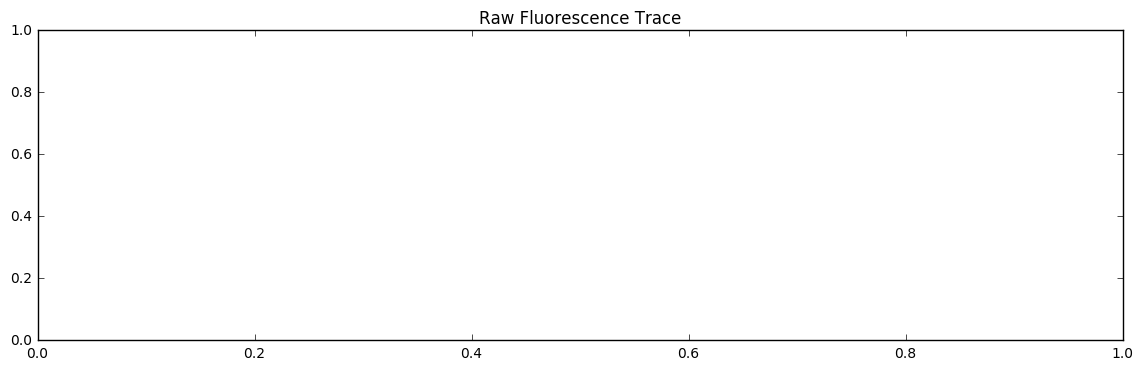

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

# plot raw and corrected ROI trace
plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.plot(time, raw_traces[0])
plt.show()

plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, corrected_traces[0])
plt.show()

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
# warning: dF/F can occasionally be one element longer or shorter 
# than the time stamps for the original traces.
plt.plot(time[:len(dff_traces[0])], dff_traces[0])
plt.show()

## ROI Masks
If you want to take a look at the cell visually, you can open the NWB file and extract a pixel mask.  You can also pull out the maximum intensity projection of the movie for context.

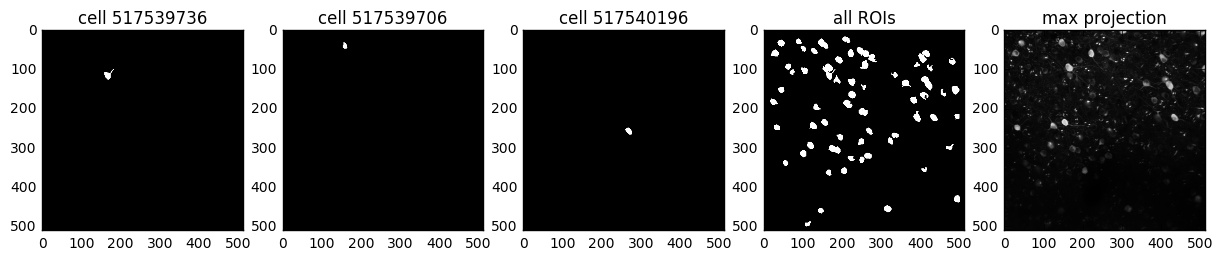

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_set = boc.get_ophys_experiment_data(510221121)

# get the specimen IDs for a few cells
cids = data_set.get_cell_specimen_ids()[:15:5]

# get masks for specific cells
roi_mask_list = data_set.get_roi_mask(cell_specimen_ids=cids)

# plot each mask
f, axes = plt.subplots(1, len(cids)+2, figsize=(15, 3))
for ax, roi_mask, cid in zip(axes[:-2], roi_mask_list, cids):
    ax.imshow(roi_mask.get_mask_plane(), cmap='gray')
    ax.set_title('cell %d' % cid)

# make a mask of all ROIs in the experiment    
all_roi_masks = data_set.get_roi_mask_array()
combined_mask = all_roi_masks.max(axis=0)

axes[-2].imshow(combined_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# show the movie max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

plt.show()

## ROI Analysis
The code to compute all of the cell metrics available for download (along with several others we haven't put in our database yet) is in the AllenSDK.  All you need is an NWB file.  For example, this is how you compute metrics for the drifting gratings stimulus and plot some results.

In [12]:
from allensdk.brain_observatory.drifting_gratings import DriftingGratings

# example loading drifing grating data
data_set = boc.get_ophys_experiment_data(512326618)
dg = DriftingGratings(data_set)
print("done analyzing drifting gratings")

TypeError: slice indices must be integers or None or have an __index__ method

In [897]:
dg.number_tf

6

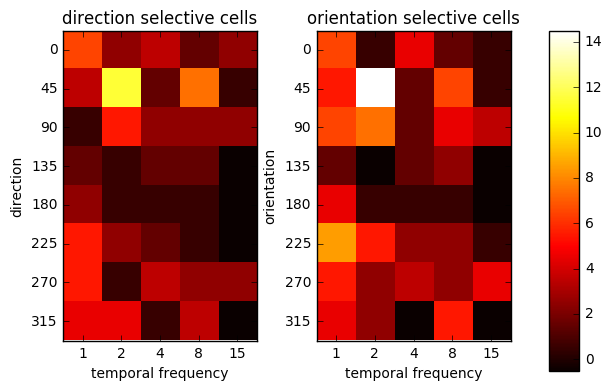

In [68]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# filter for visually responding, selective cells
vis_cells = (dg.peak.ptest_dg < 0.05) &  (dg.peak.peak_dff_dg > 3)
osi_cells = vis_cells & (dg.peak.osi_dg > 0.5) & (dg.peak.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg.peak.dsi_dg > 0.5) & (dg.peak.dsi_dg <= 1.5)

# 2-d tf vs. ori histogram
# tfval = 0 is used for the blank sweep, so we are ignoring it here
os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

for i,trial in dg.peak[osi_cells].iterrows():
    os[trial.ori_dg, trial.tf_dg-1] += 1
    
for i,trial in dg.peak[dsi_cells].iterrows():
    ds[trial.ori_dg, trial.tf_dg-1] += 1

max_count = max(os.max(), ds.max())

fig, (ax1, ax2) = plt.subplots(1,2)

# plot direction selectivity
im = ax1.imshow(ds, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax1.set_xlabel('temporal frequency')
ax1.set_ylabel('direction')
ax1.set_xticks(np.arange(len(dg.tfvals)-1))
ax1.set_xticklabels(dg.tfvals[1:])
ax1.set_yticks(np.arange(len(dg.orivals)))
ax1.set_yticklabels(dg.orivals)
ax1.set_title('direction selective cells')

# plot orientation selectivity
im = ax2.imshow(os, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax2.set_xlabel('temporal frequency')
ax2.set_ylabel('orientation')
ax2.set_xticks(np.arange(len(dg.tfvals)-1))
ax2.set_xticklabels(dg.tfvals[1:])
ax2.set_yticks(np.arange(len(dg.orivals)))
ax2.set_yticklabels(dg.orivals)
ax2.set_title('orientation selective cells')

# plot a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(0, max_count, 2)+0.5)
cbar.set_ticklabels(np.arange(0, max_count, 2, dtype=int))

plt.show()

## Neuropil Correction
All of the raw fluorescence traces are available in NWB files, but some of these signals are contaminated by nearby neuropil signal.  The code to perform neuropil correction is available in the AllenSDK and can be used as follows:

In [81]:
from allensdk.brain_observatory.r_neuropil import estimate_contamination_ratios

data_set = boc.get_ophys_experiment_data(510221121)

csid = data_set.get_cell_specimen_ids()[0]

time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[csid])
_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[csid])

results = estimate_contamination_ratios(raw_traces[0], neuropil_traces[0])
correction = raw_traces[0] - results['r'] * neuropil_traces[0]
print("r = %f" % results['r'])
print("max error = %f" % results['err'])

r = 0.241000
max error = 0.003784


The NWB files contain the neuropil traces and `r` values needed to perform this correction, so you don't need to recompute them.  The corrected trace can be computed on the fly when you use the `get_corrected_fluorescence_traces` method:

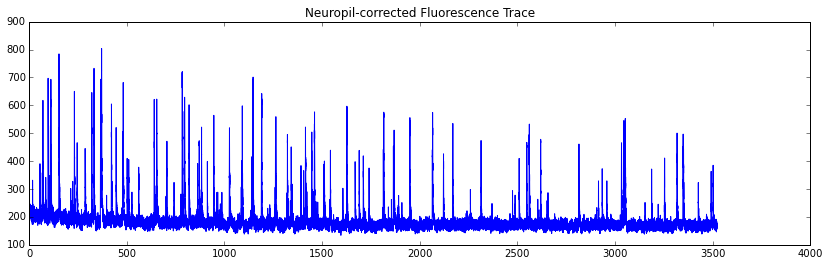

In [19]:
_, corrected_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=[csid])

plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, corrected_traces[0])
plt.show()

## Compute dF/F
You can compute dF/F for yourself using the `allensdk.brain_observatory.dff` module.

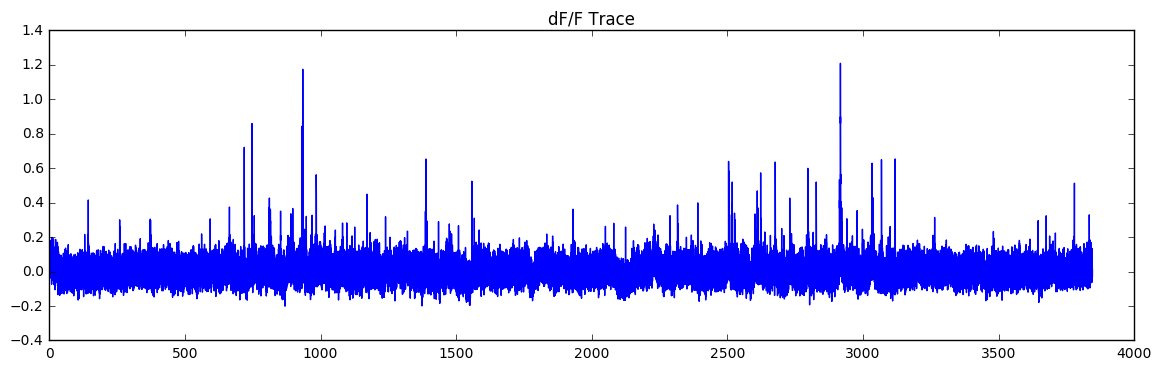

In [82]:
from allensdk.brain_observatory.dff import compute_dff

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
dff = compute_dff(np.array(corrected_traces))
plt.plot(time, dff[0,:])
plt.show()

## Running Speed
We recorded the animal's running speed during the course of the experiment and made it available in the NWB file.

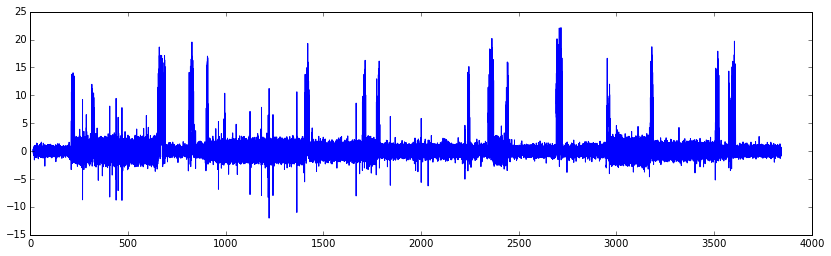

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

data_set = boc.get_ophys_experiment_data(501940850)

dxcm, dxtime = data_set.get_running_speed()
plt.figure(figsize=(14,4))
plt.plot(dxtime, dxcm)
plt.show()

## Motion Correction
X and Y translation values in pixels required to correct for motion artifacts during the experiment are available as well.

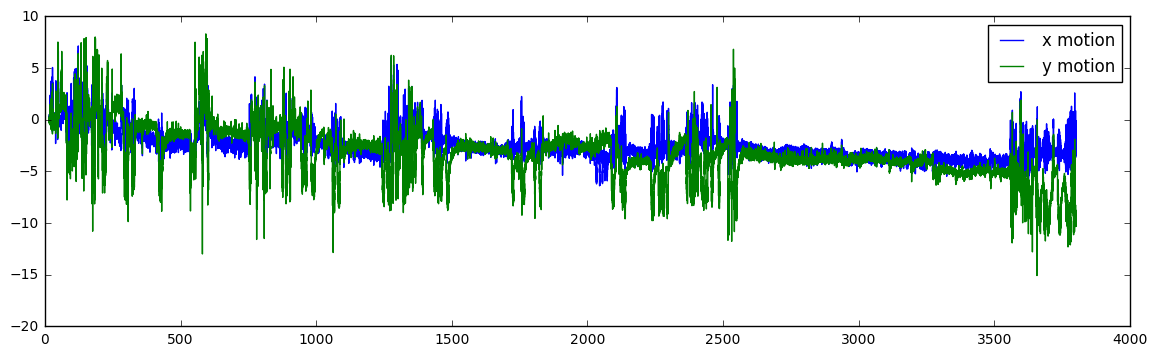

In [104]:
from matplotlib import pyplot as plt
%matplotlib inline

data_set = boc.get_ophys_experiment_data(503820068)

mc = data_set.get_motion_correction()

plt.figure(figsize=(14,4))
plt.plot(mc.timestamp, mc.x_motion)
plt.plot(mc.timestamp, mc.y_motion)
plt.legend(['x motion','y motion'])
plt.show()

In [112]:
dsi_cells.iloc[0]['cell_specimen_id']

517397327

In [96]:
#data_set = boc.get_ophys_experiment_data(501889084)
#data_set = boc.get_ophys_experiment_data(511534603)
#data_set = boc.get_ophys_experiment_data(512326618)
#data_set = boc.get_ophys_experiment_data(503820068)
#data_set = boc.get_ophys_experiment_data(510221121)
#data_set = boc.get_ophys_experiment_data(510698988)
#data_set = boc.get_ophys_experiment_data(512145745)
#data_set = boc.get_ophys_experiment_data(506823562) #unusual set; has 1 neuron with v large transient, dominates pop rate
#data_set = boc.get_ophys_experiment_data(506809539)
data_set = boc.get_ophys_experiment_data(510517131)


# Download the ophys experiments containing the drifting gratings stimulus for VISp experiment containers
#spont_exps = boc.get_ophys_experiments(experiment_container_ids=dsi_ec_ids, stimuli=[stim_info.SPONTANEOUS_ACTIVITY])
#data_set = exp #boc.get_ophys_experiment_data(spont_exps[0]['experiment_container_id'])

#print("VISp spont activity ophys experiments: %d" % len(dsi_exps))


time, dff_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=data_set.get_cell_specimen_ids()[:])
table = data_set.get_spontaneous_activity_stimulus_table()

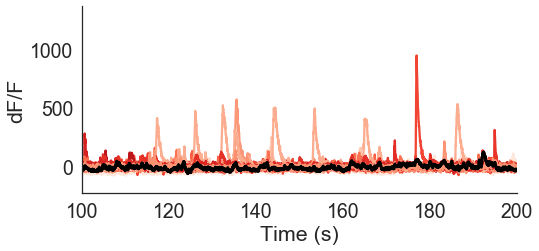

In [169]:
plt.figure(figsize=(8,4))
#plt.title("dF/F Trace")

cmap = plt.cm.get_cmap('Reds')

T = 50000
rgba = cmap(0.5)
for i in xrange(50):
    #plt.plot(time[:T], np.log10(dff_traces[i,:T]),color=cmap(pop_corr[i]))
    #plt.plot(time[:T], np.log10(1.0*np.mean(dff_traces[:,:T],axis=0)),color='black',lw=3)
    
    plt.plot(time[:T], (dff_traces[i,:T]) - np.mean(dff_traces[i,:T]),color=cmap(pop_corr[i]))
plt.plot(time[:T], 5.0*np.mean(dff_traces[:,:T],axis=0)- 5.0*np.mean(dff_traces[:,:T]),color='black',lw=3)
#plt.plot(time,0.25*data_set.get_running_speed()[0],'--')
plt.xlim(100,200)
plt.ylabel('dF/F')
plt.xlabel('Time (s)')

#cb1 = plt.colorbar.ColorbarBase(ax1, cmap=cmap,
#                                norm=norm,
#                                orientation='horizontal')
sns.despine()
plt.tight_layout()
plt.savefig('/home/ysweeney/repos/topdown_learning/manuscript/figures/dff_PC.png',dpi=600)
#plt.figure(figsize=(14,4))
#for i in xrange(5):
#    plt.plot(time[table['start'][0]:table['end'][0]],dff_traces[i,table['start'][0]:table['end'][0]])

(0.29306660965770426, 9.5217913607078229e-07)
partial correlation SpearmanrResult(correlation=nan, pvalue=nan)


/home/ysweeney/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ysweeney/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ysweeney/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


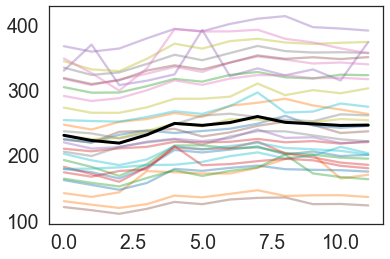

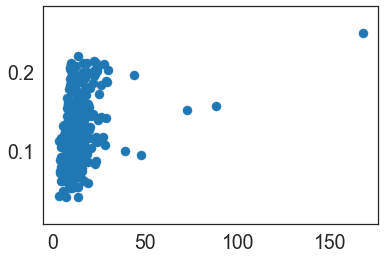

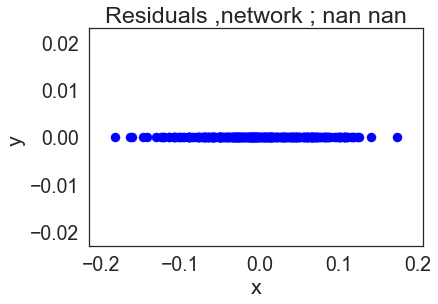

In [97]:
import scipy
import numpy


time, dff_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=data_set.get_cell_specimen_ids()[:])
table = data_set.get_spontaneous_activity_stimulus_table()

corr_coeff = numpy.corrcoef(dff_traces)

pop_corr = np.zeros(corr_coeff.shape[0])
pop_avg = np.mean(dff_traces,axis=0)

N_pop = corr_coeff.shape[0]
neurons_pop = range(N_pop)
np.random.shuffle(neurons_pop)
neurons_1st = neurons_pop[:int(0.5*N_pop)]
pop_avg_1st = np.mean(dff_traces[neurons_1st,:],axis=0)
neurons_2nd = neurons_pop[int(0.5*N_pop):]
pop_avg_2nd = np.mean(dff_traces[neurons_2nd,:],axis=0)



for i in xrange(corr_coeff.shape[0]):
    pop_corr[i] = np.corrcoef(dff_traces[i,:],pop_avg)[0][1]
    #popcorr_1st_half[i] = np.corrcoef(dff_traces[i,:(dff_traces.shape[1]*0.5)],pop_avg[:(dff_traces.shape[1]*0.5)])[0][1]
    #popcorr_2nd_half[i] = np.corrcoef(dff_traces[i,table['start'][0]:table['end'][0]],pop_avg[table['start'][0]:table['end'][0]])[0][1]
    #popcorr_2nd_half[i] = np.corrcoef(dff_traces[i,(40000+table['start'][0]):(40000+table['end'][0])],pop_avg[(40000+table['start'][0]):(40000+table['end'][0])])[0][1]


Nbins = 12
popcorr_bins = np.zeros((corr_coeff.shape[0],Nbins))
poprates_bins = np.zeros((corr_coeff.shape[0],Nbins))


binlength = int(dff_traces.shape[1]/Nbins)

popcorr_bins_1st_half = np.zeros((corr_coeff.shape[0],Nbins))
popcorr_bins_2nd_half = np.zeros((corr_coeff.shape[0],Nbins))

for j in xrange(Nbins):
    for i in xrange(corr_coeff.shape[0]):
        #mask_self = np.zeros(dff_traces.shape)
        #mask_self[i,:] = 1
        #masked_arr = np.ma.masked_array(dff_traces,mask_self)
        #masked_pop_avg = np.mean(masked_arr,axis=0)
        
    	#popcorr_bins[i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],masked_pop_avg[j*binlength:(j+1)*binlength])[0][1]
        popcorr_bins[i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]
        poprates_bins[i,j] = np.mean(dff_traces[i,j*binlength:(j+1)*binlength])
        
        popcorr_bins_1st_half[i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg_1st[j*binlength:(j+1)*binlength])[0][1]
        popcorr_bins_2nd_half[i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg_2nd[j*binlength:(j+1)*binlength])[0][1]

        
plt.figure()
for i in xrange(30):
    plt.plot(np.transpose(poprates_bins[i,:]),alpha=0.4)
plt.plot(np.mean(poprates_bins,axis=0),lw=3,color='black')

plt.figure()
plt.scatter(np.std(poprates_bins,axis=1),np.std(popcorr_bins,axis=1))
print scipy.stats.pearsonr(np.std(popcorr_bins,axis=1),np.mean(popcorr_bins,axis=1))

partial_corr(np.std(popcorr_bins,axis=1),np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))



In [77]:
Nbin_range = range(2,20,2)
popcorr_bins_binlength = np.zeros((len(Nbin_range),corr_coeff.shape[0],Nbin_range[-1]))

import seaborn as sns

color_pallete = sns.color_palette('deep',len(Nbin_range))

binlength_range = []

for Nbin_idx in xrange(len(Nbin_range)):
    binlength = int(dff_traces.shape[1]/Nbin_range[Nbin_idx])
    binlength_range.append(binlength)
    for j in xrange(Nbin_range[Nbin_idx]):
        for i in xrange(corr_coeff.shape[0]):
            mask = np.zeros(corr_coeff.shape[0])
            mask[i] = 1
            masked_arr = np.ma.masked_array(dff_traces)

            popcorr_bins_binlength[Nbin_idx,i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]


popcorr_varstats_binlength = np.zeros(len(Nbin_range))
     
plt.figure()
for idx in xrange(len(Nbin_range)):
    plt.scatter(np.mean(popcorr_bins_binlength[idx,:,:Nbin_range[idx]],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbin_range[idx]],axis=1),color=color_pallete[idx],label=Nbin_range[idx])
    popcorr_varstats_binlength[idx] = scipy.stats.pearsonr(np.mean(popcorr_bins_binlength[idx,:,:Nbin_range[idx]],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbin_range[idx]],axis=1))[0]

plt.legend()

plt.figure()
plt.plot(binlength_range,popcorr_varstats_binlength)
plt.ylim(0,0.5)

NameError: name 'corr_coeff' is not defined

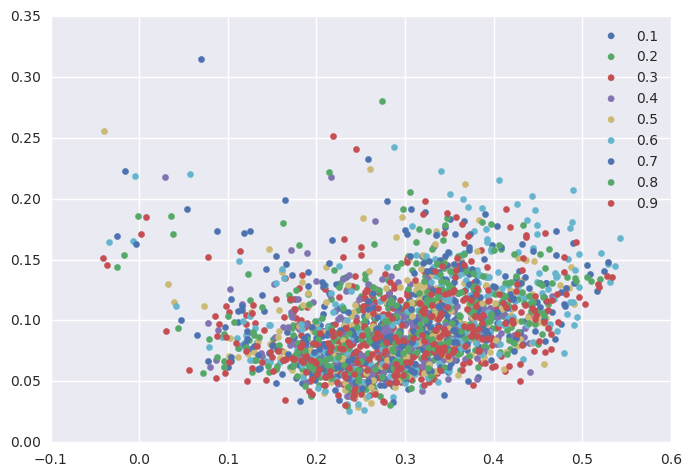

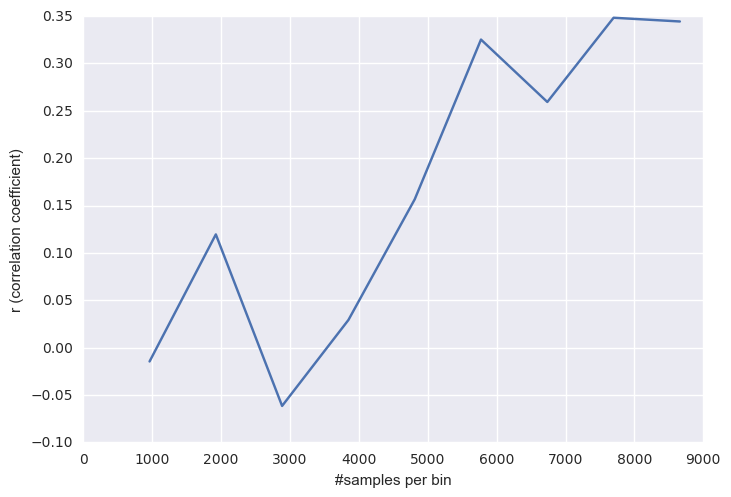

In [787]:
## Keeping NBin fixed, but varying amount of data used

frac_data_range = np.arange(0.1,1.0,0.1)
Nbins = 12

popcorr_bins_binlength = np.zeros((len(frac_data_range),corr_coeff.shape[0],Nbins))

import seaborn as sns

color_pallete = sns.color_palette('deep',len(frac_data_range))

binlength_range = []

for frac_data_idx in xrange(len(frac_data_range)):
    frac_data = frac_data_range[frac_data_idx]
    binlength = int(dff_traces.shape[1]*frac_data/Nbins)
    binlength_range.append(binlength)
    for j in xrange(Nbins):
        for i in xrange(corr_coeff.shape[0]):
            mask = np.zeros(corr_coeff.shape[0])
            mask[i] = 1
            masked_arr = np.ma.masked_array(dff_traces)

            popcorr_bins_binlength[frac_data_idx,i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]


popcorr_varstats_binlength = np.zeros(len(frac_data_range))
     
plt.figure()
for idx in xrange(len(frac_data_range)):
    plt.scatter(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbins],axis=1),color=color_pallete[idx],label=frac_data_range[idx])
    popcorr_varstats_binlength[idx] = scipy.stats.pearsonr(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbins],axis=1))[0]

plt.legend()

plt.figure()
plt.plot(binlength_range,popcorr_varstats_binlength)
plt.xlabel('#samples per bin')
plt.ylabel('r (correlation coefficient)')

In [ ]:
color_pallete = sns.color_palette

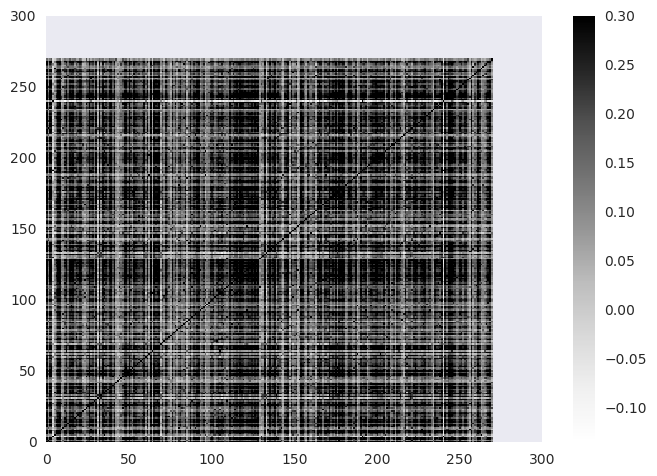

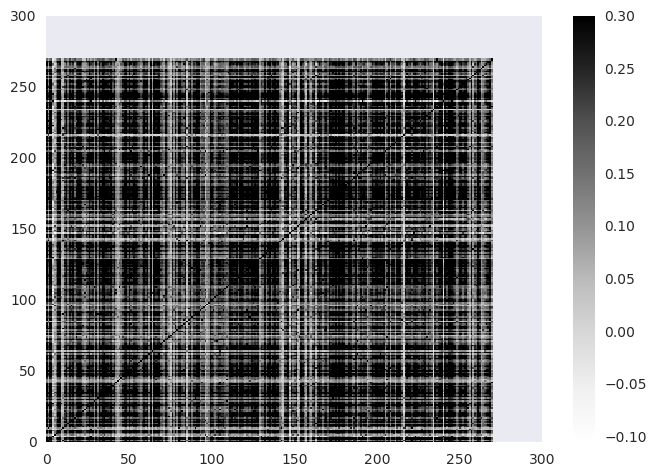

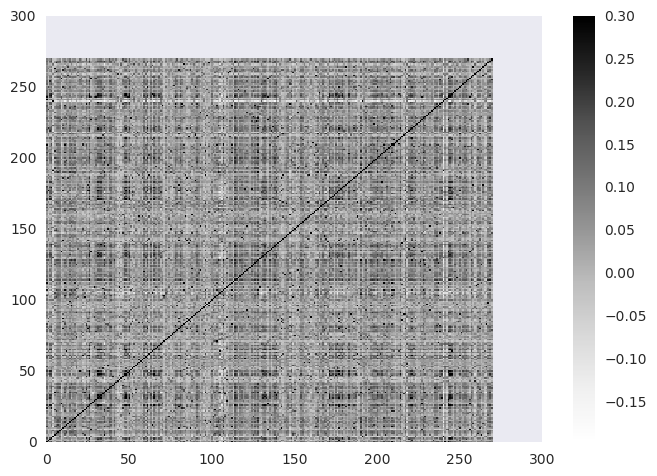

In [120]:
plt.pcolor(corr_coeff,vmax=0.3)
plt.colorbar()

plt.figure()
plt.pcolor(numpy.corrcoef(dff_traces[:,:55950]),vmax=0.3)
plt.colorbar()

plt.figure()
plt.pcolor(numpy.corrcoef(dff_traces[:,55950:]),vmax=0.3)
plt.colorbar()

(-0.5471113500685596, 1.2256758940008139e-22)

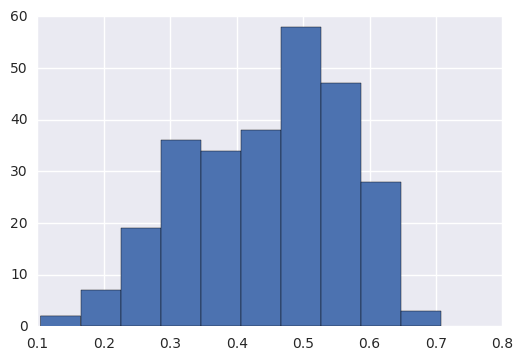

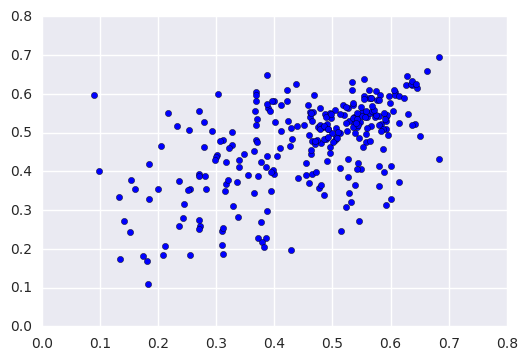

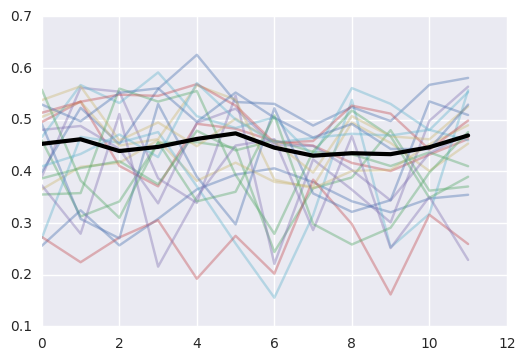

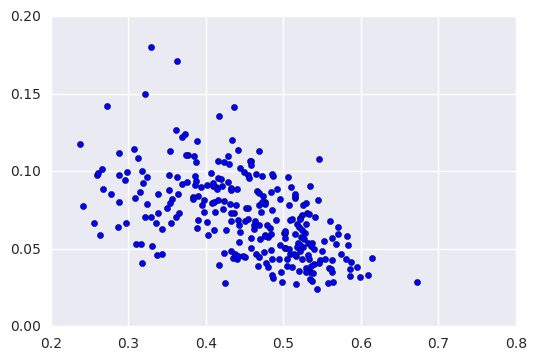

In [223]:
plt.hist(pop_corr)

plt.figure()
plt.scatter(popcorr_bins[:,0],popcorr_bins[:,-1])
#plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half-popcorr_1st_half)),color='r')
#plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half)),color='g')


plt.figure()
plt.plot(np.transpose(popcorr_bins[:20,:]),alpha=0.4)
plt.plot(np.mean(popcorr_bins,axis=0),lw=3,color='black')

plt.figure()
plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

In [101]:
data_set.get_cell_specimen_ids()

array([517539736, 517539966, 517539715, 517540119, 517539722, 517539706,
       517540273, 517540186, 517540191, 517540201, 517540196, 517540270,
       517539872, 517539868, 517539907, 517539971, 517539976, 517540042,
       517539986, 517540267, 517540181, 517540171, 517540166, 517540156,
       517540091, 517540161, 517539777, 517539762, 517539685, 517539939,
       517540031, 517540214, 517539943, 517539710, 517540228, 517539745,
       517540077, 517539757, 517540104, 517539750, 517540099, 517539927,
       517540081, 517540074, 517539931, 517539785, 517539726, 517539662,
       517540108, 517539652, 517539848, 517539852, 517540254, 517539837,
       517539627, 517539858, 517539642, 517539833, 517540257, 517539667,
       517539917, 517539897, 517539902, 517539845, 517539672, 517539922,
       517539889, 517539820, 517539951, 517539991, 517540046])

In [859]:
len(dsi_cells)

4943

In [122]:
for idx in data_set.get_cell_specimen_ids():
    for idx_j in xrange(10):
        if dsi_cells.iloc[idx_j]['cell_specimen_id'] == idx:
            print 'HIT', dsi_cells.iloc[idx_j]['cell_specimen_id'], idx


In [119]:
dsi_cells.iloc[idx_j]['cell_specimen_id']

517397398

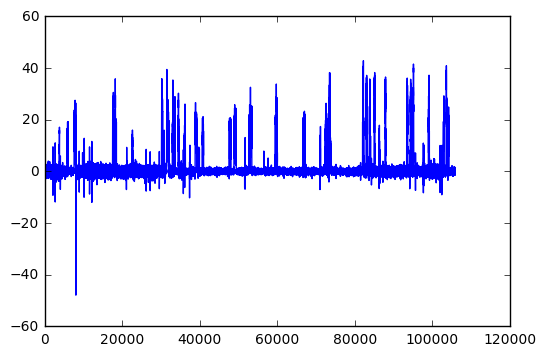

In [110]:
plt.plot(data_set.get_running_speed()[0])

In [126]:
np.savetxt('/home/ysweeney/repos/calcium_imaging/Shotgun/ABI_test_data.csv',dff_traces,delimiter=',',newline='\n')

In [132]:
len(time)/max(time)

30.08888566375667

In [74]:
import math

T = 50
#sigma = 1.0
delta = 1

def brownian_motion_log_returns(sigma):
    """
    This method returns a Wiener process. The Wiener process is also called Brownian motion. For more information
    about the Wiener process check out the Wikipedia page: http://en.wikipedia.org/wiki/Wiener_process
    :param param: the model parameters object
    :return: brownian motion log returns
    """
    sqrt_delta_sigma = math.sqrt(delta) * sigma
    return np.random.normal(loc=0, scale=sqrt_delta_sigma, size=T)



def ornstein_uhlenbeck_levels(mu,sigma):
    """
    This method returns the rate levels of a mean-reverting ornstein uhlenbeck process.
    :param param: the model parameters object
    :return: the interest rate levels for the Ornstein Uhlenbeck process
    """
    ou_levels = [0]
    brownian_motion_returns = brownian_motion_log_returns(sigma)
    for i in range(1, T):
        drift = (mu - ou_levels[i-1]) * delta
        randomness = brownian_motion_returns[i - 1]
        ou_levels.append(ou_levels[i - 1] + drift + randomness)
    return ou_levels

In [52]:
OU_noise = ornstein_uhlenbeck_levels()

In [75]:
OU_traces = np.zeros((100,50))

for i in xrange(100):
    OU_traces[i] = ornstein_uhlenbeck_levels(np.random.uniform(0,1.0),0.5)

corr_coeff = numpy.corrcoef(OU_traces)

pop_corr = np.zeros(corr_coeff.shape[0])
pop_avg = np.mean(dff_traces,axis=0)

popcorr_1st_half = np.zeros(corr_coeff.shape[0])
popcorr_2nd_half = np.zeros(corr_coeff.shape[0])

for i in xrange(corr_coeff.shape[0]):
    pop_corr[i] = np.corrcoef(dff_traces[i,:],pop_avg)[0][1]
    popcorr_1st_half[i] = np.corrcoef(OU_traces[i,:(OU_traces.shape[1]*0.5)],pop_avg[:(OU_traces.shape[1]*0.5)])[0][1]
    popcorr_2nd_half[i] = np.corrcoef(OU_traces[i,(OU_traces.shape[1]*0.5):],pop_avg[(OU_traces.shape[1]*0.5):])[0][1]

Nbins = 10
popcorr_bins = np.zeros((corr_coeff.shape[0],Nbins))
binlength = int(dff_traces.shape[1]/Nbins)

for j in xrange(Nbins):
    for i in xrange(corr_coeff.shape[0]):
    	popcorr_bins[i,j] = np.corrcoef(OU_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]

/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: all the input array dimensions except for the concatenation axis must match exactly

(0.11468593635740827, 0.25587537295931834)

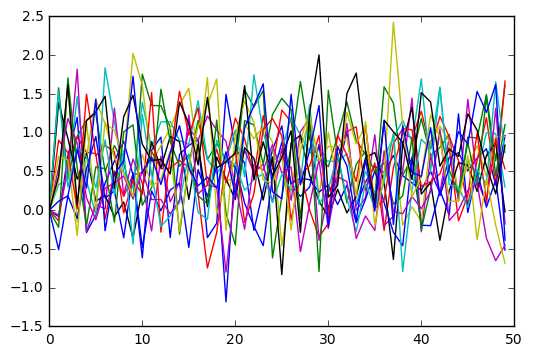

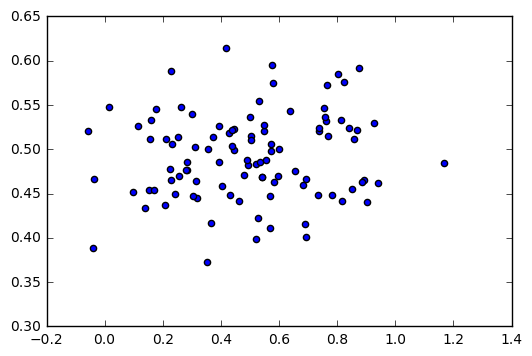

In [79]:
plt.figure()
plt.plot(np.transpose(OU_traces[:15,:]))

plt.figure()
plt.scatter(np.mean(OU_traces,axis=1),np.std(OU_traces,axis=1))

scipy.stats.pearsonr(np.mean(OU_traces,axis=1),np.std(OU_traces,axis=1))

In [308]:
from NeuroTools import stgen

gen = stgen.StGen()


In [559]:
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

R = np.corrcoef(dff_traces)

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(R.shape[0], dff_traces.shape[1]))

pop_series =  gen.OU_generator_weave1(1,100.0,3.0,0,0,dff_traces.shape[1])[0]

y = x.copy()

for i in xrange(R.shape[0]):
    x[i] =  gen.OU_generator_weave1(1,10.0,1.0,0,0,dff_traces.shape[1])[0]
    
    r = np.array([
        [ 1.0, pop_corr[i]],
        [ pop_corr[i], 1.0]])
    
    # We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
    # the Cholesky decomposition, or the we can construct `c` from the
    # eigenvectors and eigenvalues.
    c = cholesky(r, lower=True)

    # Convert the data to correlated random variables. 
    y[i] = np.dot(c,np.array([pop_series, x[i]]))[1]

/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:33: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-0.18708636241585586, 0.065092780930342861)

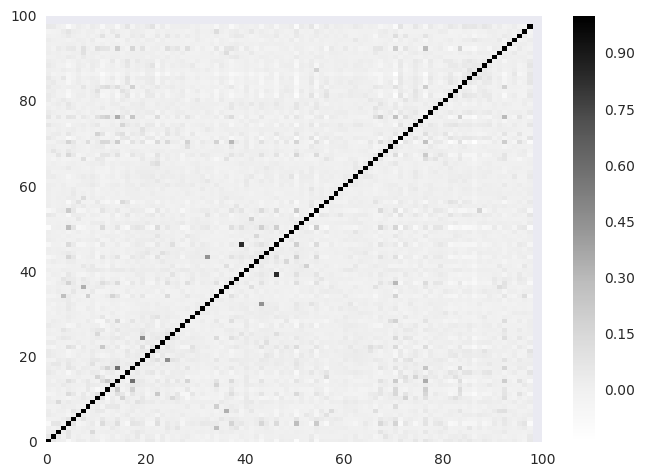

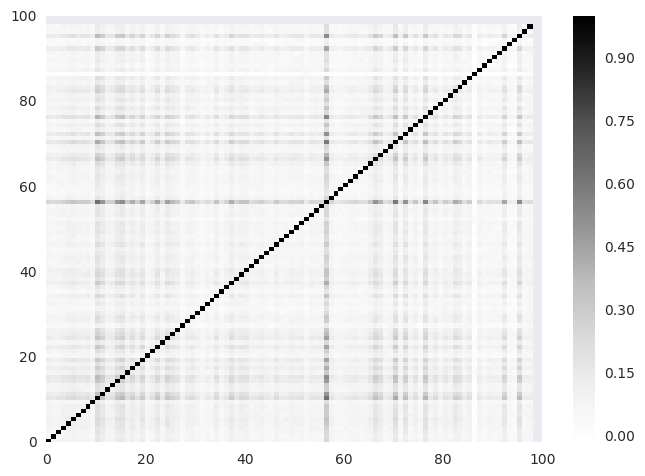

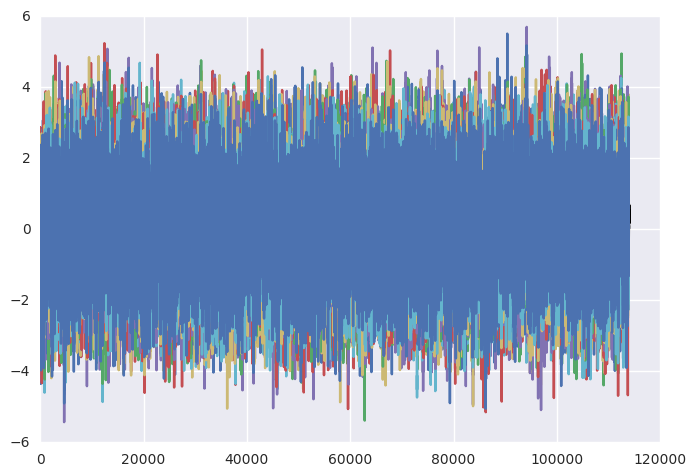

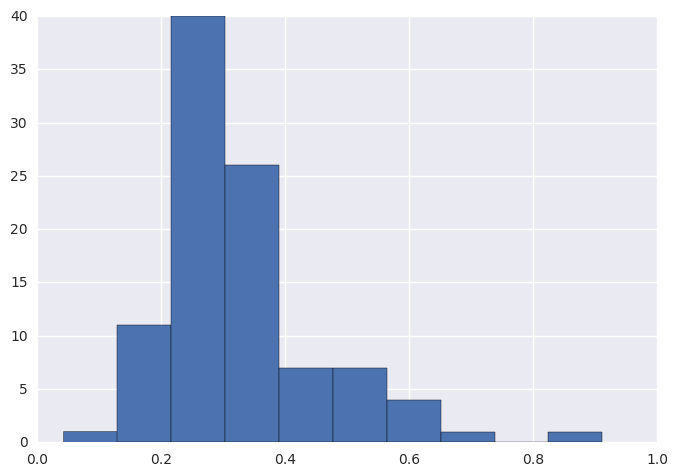

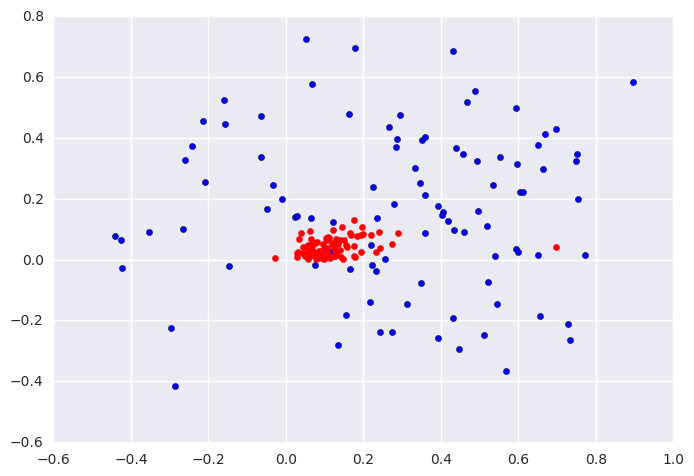

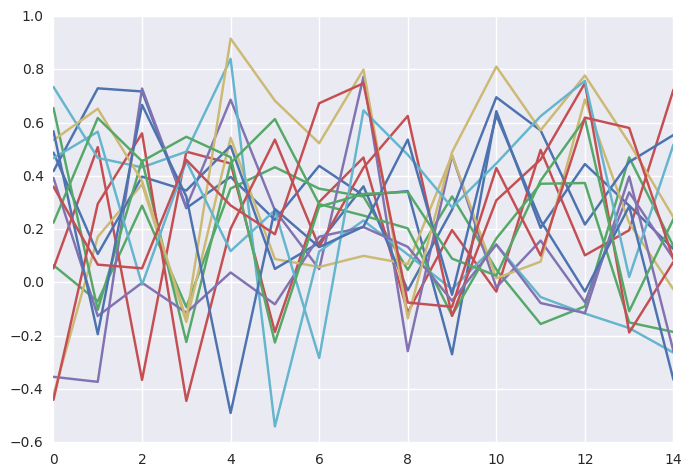

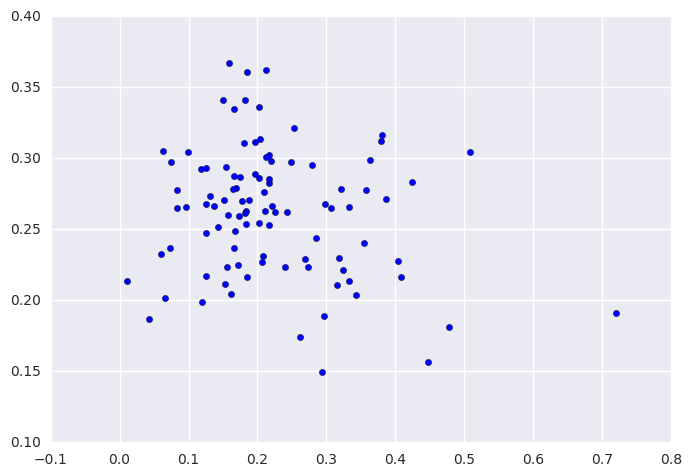

In [561]:
plt.figure()
plt.pcolor(R)
plt.colorbar()

plt.figure()
plt.pcolor(np.corrcoef(y))
plt.colorbar()

plt.figure()
plt.plot(np.mean(y,axis=0),c='black',lw=3)
plt.plot(y.transpose()[:,1:20])
#plt.xlim(1000,2000)


Nbins = 15
popcorr_bins = np.zeros((R.shape[0],Nbins))
binlength = int(y.shape[1]/Nbins)*0.02

corr_coeff_pseudo = np.corrcoef(y)
pop_avg = np.mean(y,axis=0)
pop_corr_pseudo = np.zeros(corr_coeff_pseudo.shape[0])

for i in xrange(corr_coeff_pseudo.shape[0]):
    pop_corr_pseudo[i] = np.corrcoef(y[i,:],pop_avg)[0][1]


for j in xrange(Nbins):
    for i in xrange(corr_coeff.shape[0]):
        mask = np.zeros(corr_coeff.shape[0])
        mask[i] = 1
        masked_arr = np.ma.masked_array(y)
        
    	popcorr_bins[i,j] = np.corrcoef(y[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]
        
plt.figure()
plt.hist(pop_corr_pseudo)

plt.figure()
plt.scatter(popcorr_bins[:,0],popcorr_bins[:,-1])
plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half-popcorr_1st_half)),color='r')

plt.figure()
plt.plot(np.transpose(popcorr_bins[:15,:]))

plt.figure()
plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))
    

In [412]:
R = np.zeros((len(pop_corr),len(pop_corr)))

for i in xrange(len(pop_corr)):
    R[i,:] = pop_corr[i]

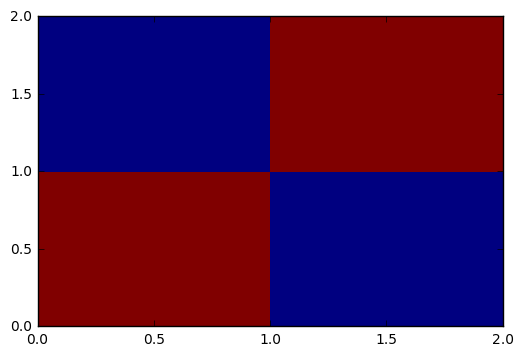

In [307]:
plt.pcolor(R)

In [57]:
static_exp_ids = boc.get_ophys_experiments(experiment_container_ids=[cux2_ecs[idx]['id'] for idx in xrange(len(cux2_ecs))], 
                                stimuli=[stim_info.STATIC_GRATINGS])
drifting_exp_ids = boc.get_ophys_experiments(experiment_container_ids=[cux2_ecs[idx]['id'] for idx in xrange(len(cux2_ecs))], 
                                stimuli=[stim_info.DRIFTING_GRATINGS])

In [ ]:
import seaborn as sns
import numpy as np
import StaticGratings_yann
import DriftingGratings_yann

reload(StaticGratings_yann)

def plot_pop_coupling_link(exp_id):
    data_set = boc.get_ophys_experiment_data(exp_id)
    
    if 'drifting_gratings' not in data_set.list_stimuli():
        print 'no drifting_gratings'
    elif 'static_gratings' not in data_set.list_stimuli():
        print 'no static_gratings'
        return None, None
    
    
    print exp_id, len(data_set.get_cell_specimen_ids())

    time, dff_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=data_set.get_cell_specimen_ids()[:])
    print dff_traces.shape[0]

    dff_means = np.mean(dff_traces,axis=1)
    pop_avg = np.mean(dff_traces,axis=0)

    dff_norms = dff_traces.copy()
    for i in xrange(dff_means.shape[0]):
        dff_norms[i,:] = dff_traces[i,:]/dff_means[i]
        
    dff_traces = dff_norms.copy()
    
    corr_coeff = np.corrcoef(dff_traces)

    pop_corr = np.zeros(corr_coeff.shape[0])
    #np.random.shuffle(pop_avg)

    popcorr_1st_half = np.zeros(corr_coeff.shape[0])
    popcorr_2nd_half = np.zeros(corr_coeff.shape[0])

    N_pop = dff_traces.shape[0]
    print scipy.stats.pearsonr(np.mean(dff_traces[:int(N_pop*0.5),:],axis=0),np.mean(dff_traces[int(N_pop*0.5):,:],axis=0))
    
    for i in xrange(corr_coeff.shape[0]):
        pop_corr[i] = np.corrcoef(dff_traces[i,:],pop_avg)[0][1]
        #popcorr_1st_half[i] = np.corrcoef(dff_traces[i,:(dff_traces.shape[1]*0.5)],pop_avg[:(dff_traces.shape[1]*0.5)])[0][1]
        #popcorr_2nd_half[i] = np.corrcoef(dff_traces[i,table['start'][0]:table['end'][0]],pop_avg[table['start'][0]:table['end'][0]])[0][1]
        #popcorr_2nd_half[i] = np.corrcoef(dff_traces[i,(40000+table['start'][0]):(40000+table['end'][0])],pop_avg[(40000+table['start'][0]):(40000+table['end'][0])])[0][1]


    Nbins = 12
    popcorr_bins = np.zeros((corr_coeff.shape[0],Nbins))
    binlength = int(dff_traces.shape[1]/Nbins)

    
    poprates_bins = np.zeros((corr_coeff.shape[0],Nbins))    

    for j in xrange(Nbins):
        for i in xrange(corr_coeff.shape[0]):
            mask = np.zeros(corr_coeff.shape[0])
            mask[i] = 1
            masked_arr = np.ma.masked_array(dff_traces)

            popcorr_bins[i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]
            poprates_bins[i,j] = np.mean(dff_traces[i,j*binlength:(j+1)*binlength])
    #plt.hist(pop_corr)

    #plt.figure()
    #plt.scatter(popcorr_bins[:,0],popcorr_bins[:,-1])
    #plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half-popcorr_1st_half)),color='r')
    #plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half)),color='g')


    #plt.figure()
    #plt.plot(np.transpose(popcorr_bins[:50,:]),alpha=0.4)
    #plt.plot(np.mean(popcorr_bins,axis=0),lw=3)

    #plt.figure()
    #plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

    
    print scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))
    print 'mean popcorr = ', np.mean(popcorr_bins)
    partial_corr(np.std(popcorr_bins,axis=1),np.mean(popcorr_bins,axis=1),np.mean(poprates_bins,axis=1),plot=False)
    partial_corr(np.std(popcorr_bins,axis=1),np.mean(popcorr_bins,axis=1),np.std(poprates_bins,axis=1),plot=False)

    
    if scipy.stats.pearsonr(np.mean(dff_traces[:int(N_pop*0.5),:],axis=0),np.mean(dff_traces[int(N_pop*0.5):,:],axis=0))[0] < 0.8:
        return None, None
    elif 'drifing_gratings' in data_set.list_stimuli():
        dg = DriftingGratings_yann.DriftingGratings_yann(data_set)
        
        dg_early_peak = dg.get_peak(0 ,80000)
        dg_early_response = dg.response_t
        # filter for visually responding, selective cells
        vis_cells_early = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
        osi_cells_early = vis_cells_early & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
        dsi_cells_early = vis_cells_early & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

        dg_late_peak = dg.get_peak(80000 ,120000)
        dg_late_response = dg.response_t

        # filter for visually responding, selective cells
        vis_cells_late = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
        osi_cells_late = vis_cells_late & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
        dsi_cells_late = vis_cells_late & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

        early_set = set(np.where(vis_cells_early>0)[0])
        late_set = set(np.where(vis_cells_late>0)[0])
        
        preserved_coupling_result_sample = {}
        
        preserved_coupling_result_sample['vis'] = (vis_cells_early,vis_cells_late)
        preserved_coupling_result_sample['osi']=(osi_cells_early,osi_cells_late)
        preserved_coupling_result_sample['dsi']=(dsi_cells_early,dsi_cells_late)
        preserved_coupling_result_sample['cv_dg']=(dg_early_peak.cv_dg ,dg_late_peak.cv_dg )
        preserved_coupling_result_sample['tf_dg']=(dg_early_peak.tf_dg ,dg_late_peak.tf_dg )
        preserved_coupling_result_sample['ptest_dg']=(dg_early_peak.ptest_dg ,dg_late_peak.ptest_dg )
        preserved_coupling_result_sample['peak_dff_dg']=(dg_early_peak.peak_dff_dg ,dg_late_peak.peak_dff_dg )
        preserved_coupling_result_sample['osi_dg']=(dg_early_peak.osi_dg ,dg_late_peak.osi_dg )
        preserved_coupling_result_sample['dsi_dg']=(dg_early_peak.dsi_dg ,dg_late_peak.dsi_dg )
        preserved_coupling_result_sample['ori_dg']=(dg_early_peak.ori_dg ,dg_late_peak.ori_dg )
        
        preserved_mean_coupling_sample =  np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))])
        non_preserved_mean_coupling_sample = np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        
        print 'presevered mean pop coupling', np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))])
        print 'non-presevered mean pop coupling', np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        print scipy.stats.ttest_ind(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))],np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        
    elif 'static_gratings' in data_set.list_stimuli():
        sg = StaticGratings_yann.StaticGratings_yann(data_set)
        
        sg_early_peak = sg.get_peak(0 ,20000)
        sg_early_response = sg.response_t
        # filter for visually responding, selective cells
        vis_cells_early = (sg.peak_t.ptest_sg < 0.05) &  (sg.peak_t.peak_dff_sg > 3)
        osi_cells_early = vis_cells_early & (sg.peak_t.osi_sg > 0.5) & (sg.peak_t.osi_sg <= 1.5)

        sg_late_peak = sg.get_peak(80000 ,120000)
        sg_late_response = sg.response_t

        # filter for visually responding, selective cells
        vis_cells_late = (sg.peak_t.ptest_sg < 0.05) &  (sg.peak_t.peak_dff_sg > 3)
        osi_cells_late = vis_cells_late & (sg.peak_t.osi_sg > 0.5) & (sg.peak_t.osi_sg <= 1.5)

        early_set = set(np.where(vis_cells_early>0)[0])
        late_set = set(np.where(vis_cells_late>0)[0])
        
        preserved_coupling_result_sample = {}
        
        preserved_coupling_result_sample['vis'] = (vis_cells_early,vis_cells_late)
        preserved_coupling_result_sample['osi']=(osi_cells_early,osi_cells_late)
        preserved_coupling_result_sample['sf_sg']=(sg_early_peak.sf_sg ,sg_late_peak.sf_sg )
        preserved_coupling_result_sample['phase_sg']=(sg_early_peak.phase_sg ,sg_late_peak.phase_sg )
        preserved_coupling_result_sample['ptest_sg']=(sg_early_peak.ptest_sg ,sg_late_peak.ptest_sg )
        preserved_coupling_result_sample['peak_dff_sg']=(sg_early_peak.peak_dff_sg ,sg_late_peak.peak_dff_sg )
        preserved_coupling_result_sample['osi_sg']=(sg_early_peak.osi_sg ,sg_late_peak.osi_sg )
        preserved_coupling_result_sample['ori_sg']=(sg_early_peak.ori_sg ,sg_late_peak.ori_sg )
        
        preserved_mean_coupling_sample =  np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))])
        non_preserved_mean_coupling_sample = np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        
        print 'presevered mean pop coupling', np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))])
        print 'non-presevered mean pop coupling', np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        print scipy.stats.ttest_ind(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))],np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])
        
    
   	return popcorr_bins, preserved_coupling_result_sample
    
#data_set = boc.get_ophys_experiment_data(501889084)
data_set = boc.get_ophys_experiment_data(511534603)
#data_set = boc.get_ophys_experiment_data(512326618)
#data_set = boc.get_ophys_experiment_data(503820068)
#data_set = boc.get_ophys_experiment_data(510221121)
#data_set = boc.get_ophys_experiment_data(510698988)
#data_set = boc.get_ophys_experiment_data(512145745)

data_sets = [ 
501876401,  502666254,  505696248,  506773892,  507881529,  510517131,  512145745,
501574836,  501889084,  503820068,  506809539,  510698988,  512326618,
501836392,  504115289,  506773185,  506823562,  510221121,  511534603,  524691284,
501724959, 527745328,  531006860,  508753256,  531134090,  501729039,  539032421,  530958091,  528402271,
539290504,  509881188,  526504941,  541010698,  527065679,  501574836,  529693740,  510214538,  529072870]


color_pallete = sns.color_palette('deep',len(data_sets))

preserved_coupling_results = []
popcorr_bins_results = []
popcorr_mean_v_std_stats = []
#data_sets_passed = []

data_sets_passed = [501876401,
 502666254,
 510517131,
 501574836,
 506809539,
 512326618,
 501836392,
 504115289,
 506823562,
 511534603,
 524691284,
 501724959,
 527745328,
 531006860,
 508753256,
 501729039,
 539032421,
 530958091,
 528402271,
 509881188,
 526504941,
 541010698,
 527065679,
 501574836,
 529693740,
 510214538,
 529072870]


data_sets_passed = []


import os 
data_files = os.listdir('/media/ysweeney/HDD/ABI_data/boc/ophys_experiment_data/')
data_sets = []
for data_file in data_files:
    data_sets.append(int(data_file.partition('.')[0]))
   
color_pallete = sns.color_palette('deep',len(data_sets))    

for data_set_idx in xrange(len(data_sets)):
    popcorr_bins, preserved_coupling_result_sample = plot_pop_coupling_link(data_sets[data_set_idx])
    if not popcorr_bins is None:
        preserved_coupling_results.append(preserved_coupling_result_sample)
    
        stat_iter = scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))
        popcorr_mean_v_std_stats.append(stat_iter)
        popcorr_bins_results.append(popcorr_bins)
        data_sets_passed.append(data_sets[data_set_idx])
        
        
        if stat_iter[1] > 0.05:
            rval = -1.0
        else:
            rval = stat_iter[0]
        plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1),alpha=0.7,color=color_pallete[data_set_idx],label=str(rval))

plt.legend()
plt.xlabel('mean(population coupling)')
plt.ylabel('std(population coupling)')

no static_gratings
no drifting_gratings
530180254 383
383
(0.94204557, 0.0)
(-0.0027488585818569488, 0.95723753547804091)
mean popcorr =  0.358451965099
partial correlation SpearmanrResult(correlation=0.018022159036539857, pvalue=0.72515602860309847)
partial correlation SpearmanrResult(correlation=-0.0080232099162030265, pvalue=0.87563371528148337)
presevered mean pop coupling nan
non-presevered mean pop coupling nan
Ttest_indResult(statistic=nan, pvalue=nan)
no static_gratings
no static_gratings
no static_gratings
no static_gratings
no drifting_gratings
510221121 71
71
(0.2538574, 0.0)
(0.48218830698175313, 2.0630931183282033e-05)
mean popcorr =  0.128820766113
partial correlation SpearmanrResult(correlation=0.31696847753185775, pvalue=0.007076050703538876)
partial correlation SpearmanrResult(correlation=0.16817572099262237, pvalue=0.16093669282641676)
no drifting_gratings
512145745 58
58
(0.15379894, 0.0)
(0.67857920922219284, 4.8124505586219525e-09)
mean popcorr =  0.140129245597
pa

In [76]:
## Keeping NBin fixed, but varying amount of data used

def vary_binlength(Nbins):
    frac_data_range = np.arange(0.1,1.0,0.1)

    popcorr_bins_binlength = np.zeros((len(frac_data_range),corr_coeff.shape[0],Nbins))

    import seaborn as sns

    color_pallete = sns.color_palette('deep',len(frac_data_range))

    binlength_range = []
        
    for frac_data_idx in xrange(len(frac_data_range)):
        frac_data = frac_data_range[frac_data_idx]
        binlength = int(dff_traces.shape[1]*frac_data/Nbins)
        binlength_range.append(binlength)
        for j in xrange(Nbins):
            for i in xrange(corr_coeff.shape[0]):
                mask = np.zeros(corr_coeff.shape[0])
                mask[i] = 1
                masked_arr = np.ma.masked_array(dff_traces)

                popcorr_bins_binlength[frac_data_idx,i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]


    popcorr_varstats_binlength = np.zeros(len(frac_data_range))

    #plt.figure()
    for idx in xrange(len(frac_data_range)):
        #plt.scatter(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbins],axis=1),color=color_pallete[idx],label=frac_data_range[idx])
        popcorr_varstats_binlength[idx] = scipy.stats.pearsonr(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbins],axis=1))[0]

    plt.plot(binlength_range,popcorr_varstats_binlength)
    plt.xlabel('#samples per bin')
    plt.ylabel('r (correlation coefficient)')
    
    
def vary_popavg_sample_frac(Nbins,color_plot):
    frac_data_range = np.arange(0.02,1.01,0.05)
    
    N_pop = dff_traces.shape[0]

    popcorr_bins_binlength = np.zeros((len(frac_data_range),corr_coeff.shape[0],Nbins))

    import seaborn as sns

    color_pallete = sns.color_palette('deep',len(frac_data_range))

    binlength_range = []
        
    for frac_data_idx in xrange(len(frac_data_range)):
        frac_data = frac_data_range[frac_data_idx]
        neurons_pop = range(N_pop)
        np.random.shuffle(neurons_pop)
        neurons_pop = neurons_pop[:int(frac_data*N_pop)]
        pop_avg = np.mean(dff_traces[neurons_pop,:],axis=0)
        
        binlength = int(dff_traces.shape[1]/Nbins)
        binlength_range.append(binlength)
        for j in xrange(Nbins):
            for i in xrange(corr_coeff.shape[0]):
                mask = np.zeros(corr_coeff.shape[0])
                mask[i] = 1
                masked_arr = np.ma.masked_array(dff_traces)

                popcorr_bins_binlength[frac_data_idx,i,j] = np.corrcoef(dff_traces[i,j*binlength:(j+1)*binlength],pop_avg[j*binlength:(j+1)*binlength])[0][1]


    popcorr_varstats_binlength = np.zeros(len(frac_data_range))

    #plt.figure()
    for idx in xrange(len(frac_data_range)):
        stats = scipy.stats.pearsonr(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.mean(popcorr_bins_binlength[-1,:,:Nbins],axis=1))
        #plt.scatter(np.mean(popcorr_bins_binlength[idx,:,:Nbins],axis=1),np.std(popcorr_bins_binlength[idx,:,:Nbins],axis=1),color=color_plot,label=stats[0])
        popcorr_varstats_binlength[idx] = stats[0]
    plt.plot(frac_data_range,popcorr_varstats_binlength)
    plt.xlabel('#frac neuron in pop avg')
    plt.ylabel('r (correlation coefficient)')
    
    
#plt.legend(['8 bins','10 bins','12 bins'])
#vary_binlength(8)
#vary_binlength(10)
#vary_binlength(12)
#plt.ylim(0.0,1.0)

color_pallete = sns.color_palette('deep',5)
vary_popavg_sample_frac(1,color_pallete[0])
plt.legend()

NameError: name 'sns' is not defined

NameError: name 'popcorr_1st_half' is not defined

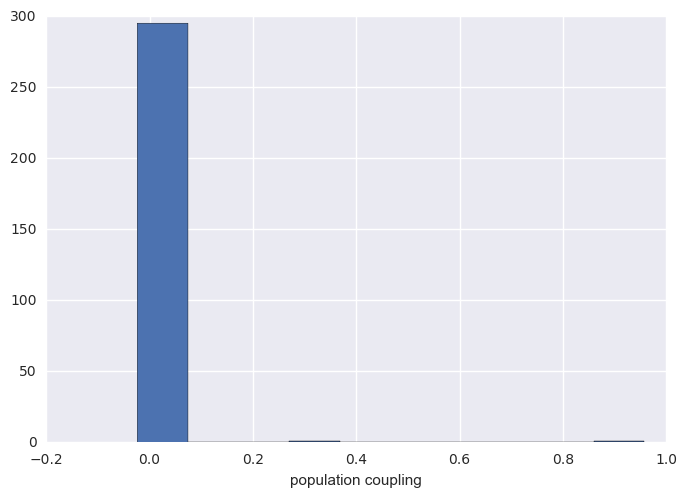

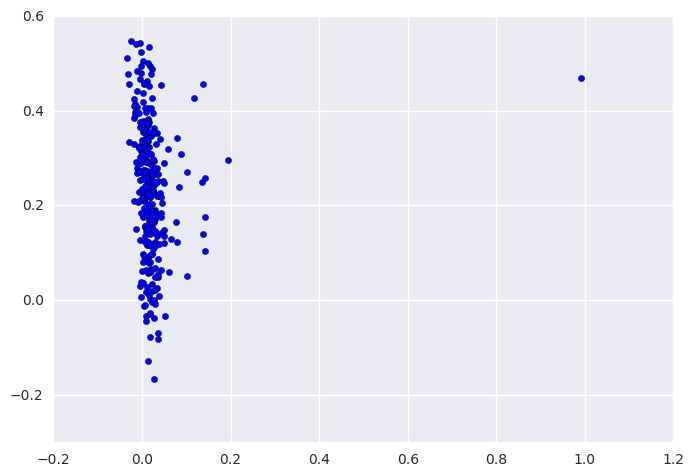

In [57]:
plt.hist(pop_corr)
plt.xlabel('population coupling')

plt.figure()
plt.scatter(popcorr_bins[:,0],popcorr_bins[:,-1])
#plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half-popcorr_1st_half)),color='r')
plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half)),color='g')


plt.figure()
plt.plot(np.transpose(popcorr_bins[:20,:]),alpha=0.4)
plt.plot(np.mean(popcorr_bins,axis=0),lw=3,color='black')
plt.xlabel('time bin')
plt.ylabel('population coupling')

plt.figure()
plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))
plt.ylabel('std(population coupling)')
plt.xlabel('mean(population coupling)')

scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

(1000, 1500)

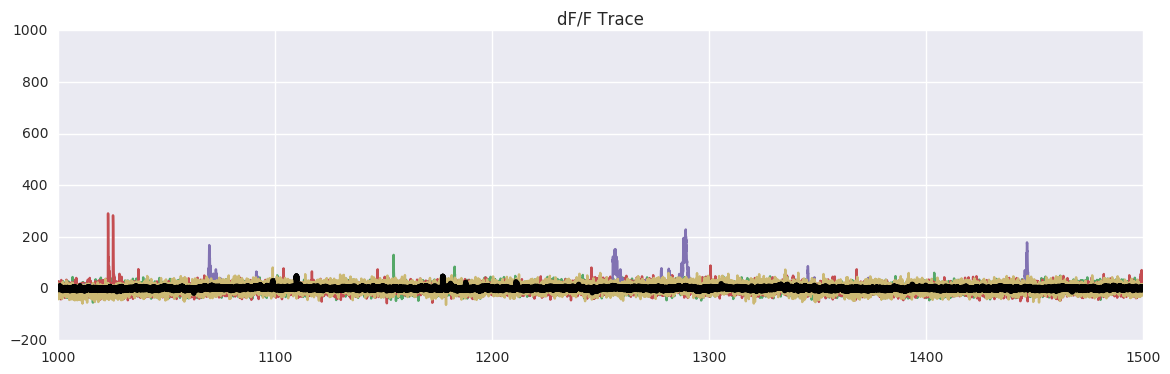

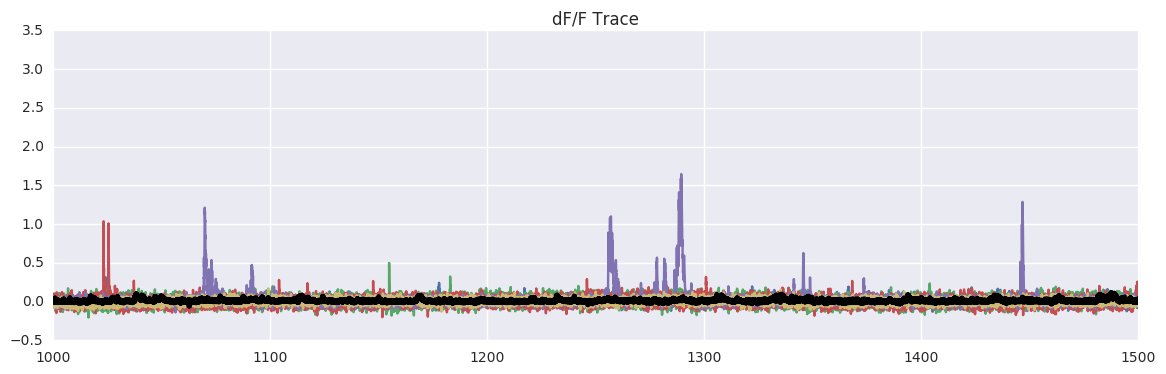

In [677]:
dff_means = np.mean(dff_traces,axis=1)

dff_norms = dff_traces.copy()
for i in xrange(dff_means.shape[0]):
    dff_norms[i,:] = dff_traces[i,:]/dff_means[i]
    
    
plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
for i in xrange(5):
    plt.plot(time, dff_norms[i,:])
    plt.plot(time, np.mean(dff_norms,axis=0),color='black',lw=4)
#plt.plot(time,0.25*data_set.get_running_speed()[0],'--')
plt.xlim(1000,1500)

plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
for i in xrange(5):
    plt.plot(time, dff_traces[i,:])
    plt.plot(time, np.mean(dff_traces,axis=0),color='black',lw=4)
#plt.plot(time,0.25*data_set.get_running_speed()[0],'--')
plt.xlim(1000,1500)


In [790]:
pop_avg_frac_range = np.arange(0.5,1.3,0.1)
N_trials = 10
N_pop = dff_traces.shape[0]

popcorr_trials = np.zeros((len(pop_avg_frac_range),N_trials,N_pop))

for pop_avg_frac_idx in xrange(len(pop_avg_frac_range)):
    for trial_idx in xrange(N_trials):
        frac_data = pop_avg_frac_range[pop_avg_frac_idx]
        neurons_pop = range(N_pop)
        np.random.shuffle(neurons_pop)
        neurons_pop = neurons_pop[:int(frac_data*N_pop)]
        pop_avg = np.mean(dff_traces[neurons_pop,:],axis=0)
        
        for j in xrange(N_pop):
            popcorr_trials[pop_avg_frac_idx,trial_idx,j] = np.corrcoef(dff_traces[j,:],pop_avg)[0][1]
    #plt.scatter(popcorr_trials[pop_avg_frac_idx,0,:],popcorr_trials[pop_avg_frac_idx,2,:],color=color_pallete[pop_avg_frac_idx])
    #plt.plot(np.std(popcorr_trials[pop_avg_frac_idx,:,:],axis=0))

for i in xrange(4):
    plt.plot(range(N_trials),popcorr_trials[i,:,:5],color=color_pallete[i],label=pop_avg_frac_range[i])
plt.legend()

KeyboardInterrupt: 

0 drifting_gratings
1 natural_movie_one
2 natural_movie_three
3 

/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ysweeney/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


spontaneous
(0.62770408, 0.0)
[[ 1.          0.56180761]
 [ 0.56180761  1.        ]]
[[ 1.          0.22932767]
 [ 0.22932767  1.        ]]


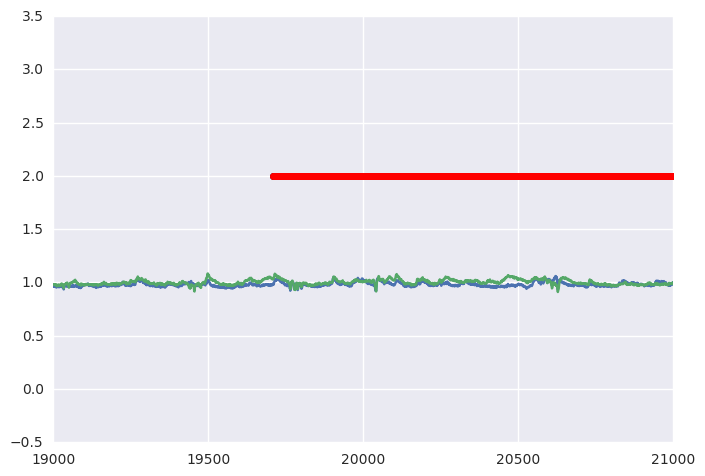

In [92]:
N_pop = dff_traces.shape[0]

time_map = build_stim_history_from_dataset(data_set)

plt.plot(np.mean(dff_traces[:(N_pop*0.5),:],axis=0)/250)
plt.plot(np.mean(dff_traces[(N_pop*0.5):,:],axis=0)/250)
#plt.plot(np.mean(dff_traces[:,:],axis=0))
plt.xlim(19000,21000)

print scipy.stats.pearsonr(np.mean(dff_traces[:(N_pop*0.5),:],axis=0),np.mean(dff_traces[(N_pop*0.5):,:],axis=0))
print scipy.corrcoef(np.mean(dff_traces[:(N_pop*0.2),:],axis=0),np.mean(dff_traces[(N_pop*0.8):,:],axis=0))
print scipy.corrcoef(np.mean(dff_traces[:(N_pop*0.1),:],axis=0),np.mean(dff_traces[(N_pop*0.9):,:],axis=0))

272
0 drifting_gratings
1 natural_movie_one
2 natural_movie_three
3 spontaneous
(-0.5471113500685596, 1.2256758940008139e-22)
(-0.59041868917123319, 6.0496156036554056e-27)


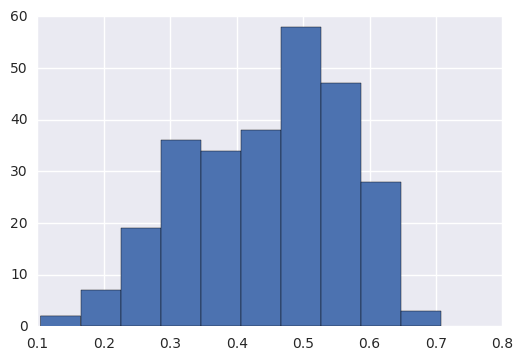

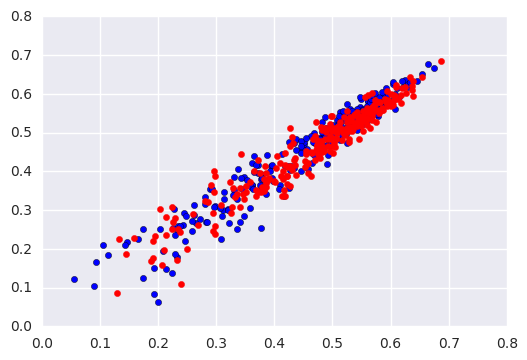

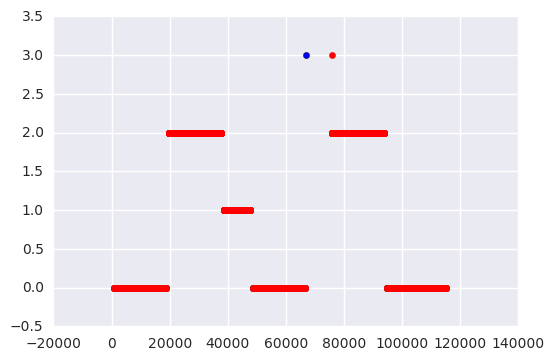

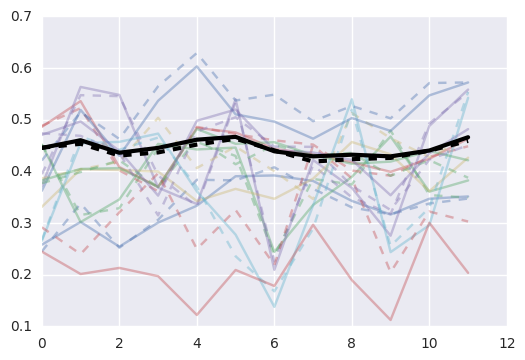

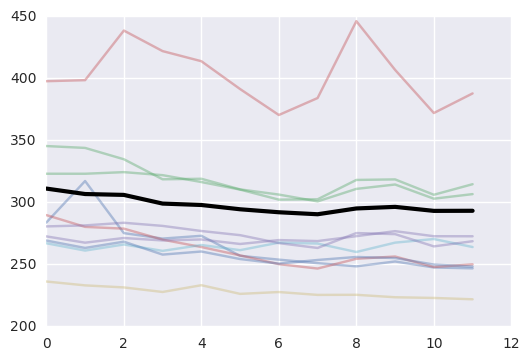

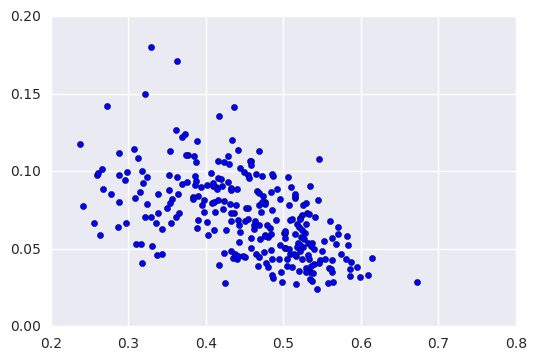

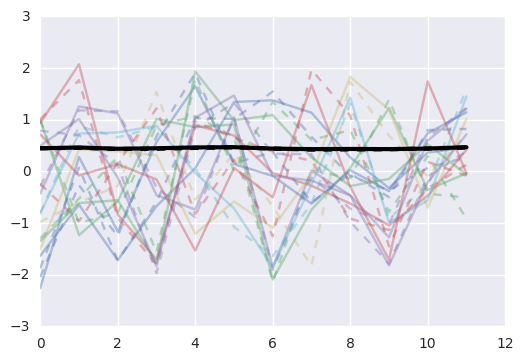

In [243]:
import seaborn as sns

plt.hist(pop_corr)

print(len(pop_corr))

plt.figure()
plt.scatter(popcorr_bins_1st_half[:,0],popcorr_bins_2nd_half[:,0])
plt.scatter(popcorr_bins_1st_half[:,-1],popcorr_bins_2nd_half[:,-1],color='r')

#plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half-popcorr_1st_half)),color='r')
#plt.scatter(popcorr_1st_half,np.abs((popcorr_2nd_half)),color='g')

color_pallete = sns.color_palette('deep',20)

plt.figure()
time_map = build_stim_history_from_dataset(data_set)


plt.figure()

for i in xrange(10):
    plt.plot(np.transpose(popcorr_bins_1st_half[i,:]),alpha=0.4,color=color_pallete[i])
    plt.plot(np.transpose(popcorr_bins_2nd_half[i,:]),'--',alpha=0.4,color=color_pallete[i])
plt.plot(np.mean(popcorr_bins_1st_half,axis=0),lw=3,color='black')
plt.plot(np.mean(popcorr_bins_2nd_half,axis=0),'--',lw=3,color='black')


plt.figure()
for i in xrange(10):
    plt.plot(np.transpose(poprates_bins[i,:]),alpha=0.4,color=color_pallete[i])
plt.plot(np.mean(poprates_bins,axis=0),lw=3,color='black')


plt.figure()
plt.scatter(np.mean(popcorr_bins,axis=1),np.std(popcorr_bins,axis=1))

print scipy.stats.pearsonr(np.mean((popcorr_bins),axis=1),np.std((popcorr_bins),axis=1))


plt.figure()
for i in xrange(10):
    plt.plot(scipy.stats.zscore(np.transpose(popcorr_bins_1st_half[i,:]),axis=0),alpha=0.4,color=color_pallete[i])
    plt.plot(scipy.stats.zscore(np.transpose(popcorr_bins_2nd_half[i,:]),axis=0),'--',alpha=0.4,color=color_pallete[i])
plt.plot(np.mean(popcorr_bins_1st_half,axis=0),lw=3,color='black')
plt.plot(np.mean(popcorr_bins_2nd_half,axis=0),'--',lw=3,color='black')

print scipy.stats.pearsonr(np.mean(scipy.stats.zscore(popcorr_bins),axis=1),np.std(scipy.stats.zscore(popcorr_bins),axis=1))


In [911]:
from allensdk.brain_observatory.session_analysis import run_session_analysis

run_session_analysis('boc/ophys_experiment_data/501889084.nwb')

TypeError: run_session_analysis() takes at least 2 arguments (1 given)

ValueError: x and y must be the same size

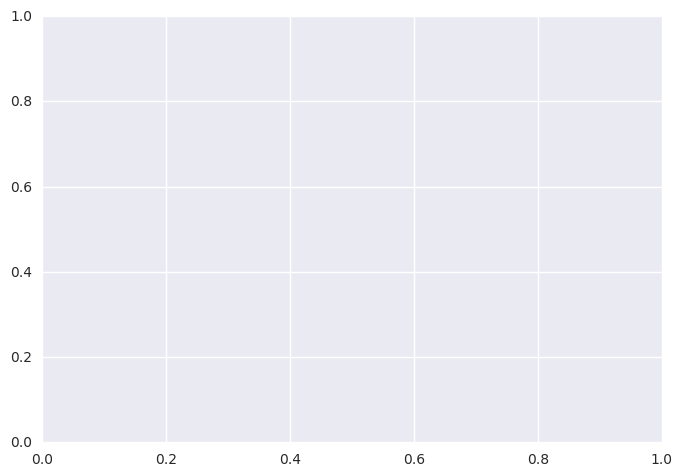

In [950]:
# attempting to plot pop_coupling Vs standard error of mean of dg response
plt.scatter(pop_corr,dg.response[0,0,:,1])


In [4]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
#cux2_ec_id = cux2_ecs[8]['id']
#exp = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id], 
#                                stimuli=[stim_info.STATIC_GRATINGS])[0]
#print("Experiment with static gratings:")
#pprint.pprint(exp)


for idx in xrange(20,30):
    cux2_ec_id = cux2_ecs[idx]['id']
    exp = boc.get_ophys_experiments(experiment_container_ids=[cux2_ec_id], 
                                    stimuli=[stim_info.DRIFTING_GRATINGS])[0]
    data_set = boc.get_ophys_experiment_data(exp['id'])

    print("Experiment with drifting gratings:")
    pprint.pprint(exp)

Experiment with drifting gratings:
{'age_days': 152.0,
 'cre_line': u'Cux2-CreERT2',
 'donor_name': u'222426',
 'experiment_container_id': 511510715,
 'id': 501876401,
 'imaging_depth': 175,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'session_type': u'three_session_A',
 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'targeted_structure': u'VISal'}
Experiment with drifting gratings:
{'age_days': 156.0,
 'cre_line': u'Cux2-CreERT2',
 'donor_name': u'222424',
 'experiment_container_id': 511510817,
 'id': 504115289,
 'imaging_depth': 175,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'session_type': u'three_session_A',
 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222424',
 'targeted_structure': u'VISpm'}
Experiment with drifting gratings:
{'age_days': 111.0,
 'cre_line': u'Cux2-CreERT2',
 'donor_name': u'229470',
 'experiment_container_id': 511510893,
 'id': 506773185,
 'imaging_depth': 175,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'session_type': u'three_session_A',
 'specimen_

KeyboardInterrupt: 

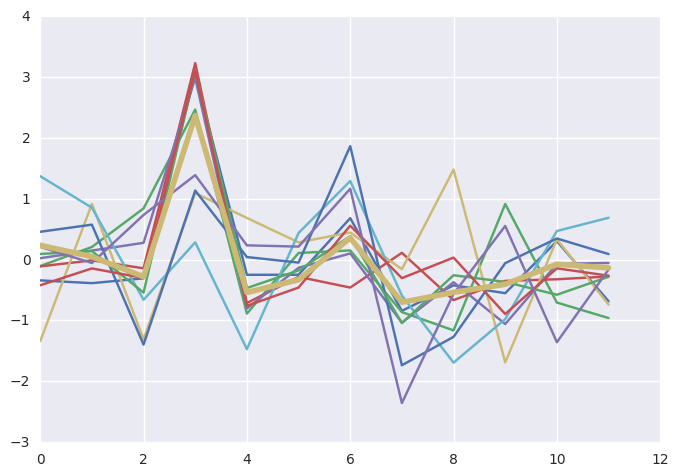

In [125]:
plt.plot(scipy.stats.zscore(np.transpose(popcorr_bins_2nd_half),axis=0)[:,:10])
plt.plot(np.mean(scipy.stats.zscore((popcorr_bins_2nd_half),axis=1),axis=0),lw=4)

In [64]:
def build_stim_history_from_dataset(data_set):
    time = data_set.get_fluorescence_timestamps()
    stims = data_set.list_stimuli()
    stim_time_map = np.zeros((len(stims),len(time)))
    
    
    
    plt.figure()
    
    for stim_idx in xrange(len(stims)):
        print stim_idx, stims[stim_idx]
        stim_table = data_set.get_stimulus_table(stims[stim_idx])
        
        plt.scatter(stim_table['start'],stim_idx*np.ones(len(stim_table['start'])))
        plt.scatter(stim_table['end'],stim_idx*np.ones(len(stim_table['end'])),color='r')
        
        #for stim_idx_t in xrange(len(stim_table['start'])):
        #    plt.plot([stim_table['start'],stim_table['end']],[stim_idx,stim_idx])
        #    
        #    where_t = np.where((time > stim_table['start'][stim_idx_t]) & (time < stim_table['end'][stim_idx_t]))[0].tolist()
        #    stim_time_map[0,where_t] = stim_idx+1
    
    return stim_time_map

0 natural_movie_one
1 natural_scenes
2 spontaneous
3 static_gratings


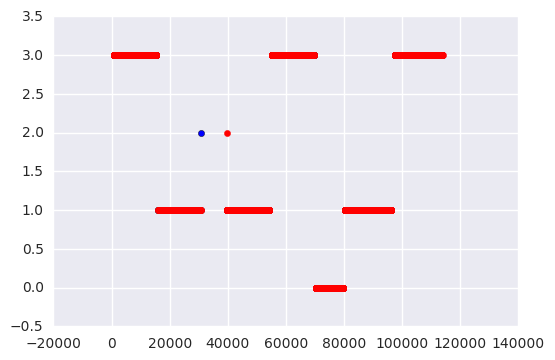

In [816]:
data_set = boc.get_ophys_experiment_data(528996585)

time_map = build_stim_history_from_dataset(data_set)


In [36]:
from allensdk.brain_observatory import stimulus_analysis

In [40]:
stimulus_analysis.StimulusAnalysis.get_sweep_response(stim_table)

TypeError: unbound method get_sweep_response() must be called with StimulusAnalysis instance as first argument (got DataFrame instance instead)

In [814]:
import StaticGratings_yann

In [817]:
reload(DriftingGratings_yann)
dg = StaticGratings_yann.StaticGratings_yann(data_set)

In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

dg.get_peak(40000 ,100000)


# filter for visually responding, selective cells
vis_cells = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
osi_cells = vis_cells & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

# 2-d tf vs. ori histogram
# tfval = 0 is used for the blank sweep, so we are ignoring it here
os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

for i,trial in dg.peak_t[osi_cells].iterrows():
    os[trial.ori_dg, trial.tf_dg-1] += 1
    
for i,trial in dg.peak_t[dsi_cells].iterrows():
    ds[trial.ori_dg, trial.tf_dg-1] += 1

max_count = max(os.max(), ds.max())

fig, (ax1, ax2) = plt.subplots(1,2)

# plot direction selectivity
im = ax1.imshow(ds, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax1.set_xlabel('temporal frequency')
ax1.set_ylabel('direction')
ax1.set_xticks(np.arange(len(dg.tfvals)-1))
ax1.set_xticklabels(dg.tfvals[1:])
ax1.set_yticks(np.arange(len(dg.orivals)))
ax1.set_yticklabels(dg.orivals)
ax1.set_title('direction selective cells')

# plot orientation selectivity
im = ax2.imshow(os, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax2.set_xlabel('temporal frequency')
ax2.set_ylabel('orientation')
ax2.set_xticks(np.arange(len(dg.tfvals)-1))
ax2.set_xticklabels(dg.tfvals[1:])
ax2.set_yticks(np.arange(len(dg.orivals)))
ax2.set_yticklabels(dg.orivals)
ax2.set_title('orientation selective cells')

# plot a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(0, max_count, 2)+0.5)
cbar.set_ticklabels(np.arange(0, max_count, 2, dtype=int))

plt.show()

dg.get_peak(0 ,30000)

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# filter for visually responding, selective cells
vis_cells = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
osi_cells = vis_cells & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

# 2-d tf vs. ori histogram
# tfval = 0 is used for the blank sweep, so we are ignoring it here
os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

for i,trial in dg.peak_t[osi_cells].iterrows():
    os[trial.ori_dg, trial.tf_dg-1] += 1
    
for i,trial in dg.peak_t[dsi_cells].iterrows():
    ds[trial.ori_dg, trial.tf_dg-1] += 1

max_count = max(os.max(), ds.max())

fig, (ax1, ax2) = plt.subplots(1,2)

# plot direction selectivity
im = ax1.imshow(ds, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax1.set_xlabel('temporal frequency')
ax1.set_ylabel('direction')
ax1.set_xticks(np.arange(len(dg.tfvals)-1))
ax1.set_xticklabels(dg.tfvals[1:])
ax1.set_yticks(np.arange(len(dg.orivals)))
ax1.set_yticklabels(dg.orivals)
ax1.set_title('direction selective cells')

# plot orientation selectivity
im = ax2.imshow(os, clim=[0,max_count], cmap='hot', interpolation='nearest')
ax2.set_xlabel('temporal frequency')
ax2.set_ylabel('orientation')
ax2.set_xticks(np.arange(len(dg.tfvals)-1))
ax2.set_xticklabels(dg.tfvals[1:])
ax2.set_yticks(np.arange(len(dg.orivals)))
ax2.set_yticklabels(dg.orivals)
ax2.set_title('orientation selective cells')

# plot a colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.05, 0.85])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks(np.arange(0, max_count, 2)+0.5)
cbar.set_ticklabels(np.arange(0, max_count, 2, dtype=int))

plt.show()

NameError: name 'dg' is not defined

0 drifting_gratings
1 natural_movie_one
2 natural_movie_three
3 spontaneous


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

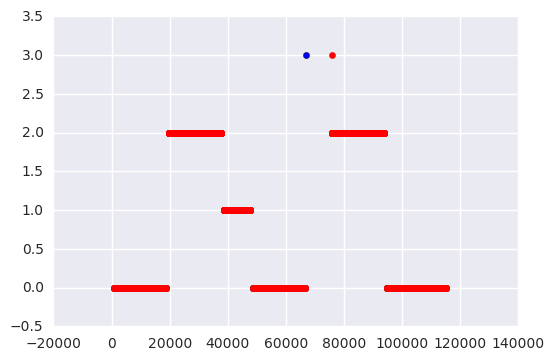

In [224]:
build_stim_history_from_dataset(data_set)

In [149]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

dg_early_peak = dg.get_peak(0 ,80000)
dg_early_response = dg.response_t
# filter for visually responding, selective cells
vis_cells_early = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
osi_cells_early = vis_cells_early & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
dsi_cells_early = vis_cells_early & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

dg_late_peak = dg.get_peak(80000 ,120000)
dg_late_response = dg.response_t

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# filter for visually responding, selective cells
vis_cells_late = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
osi_cells_late = vis_cells_late & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
dsi_cells_late = vis_cells_late & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)



test 0 80000
test 80000 120000


In [103]:
early_set = set(np.where(dsi_cells_early>0)[0])
late_set = set(np.where(dsi_cells_late>0)[0])

print len(late_set)
print len(early_set)

print len(early_set.intersection(late_set))

print len(early_set.difference(late_set).union(late_set.difference(early_set)))

66
96
34
94


0.241144188065
0.239259825136


Ttest_indResult(statistic=0.11721431667331983, pvalue=0.90687685729143919)

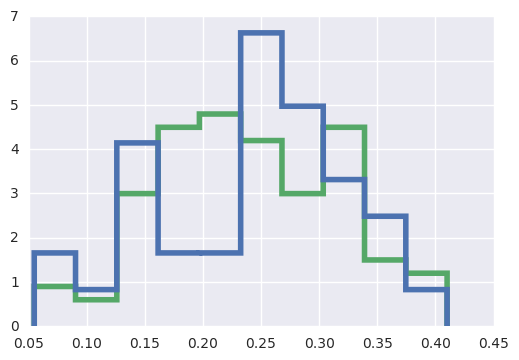

In [104]:
plt.hist([np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))],np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))]],10,histtype='step',normed=True,lw=4)
print np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))])
print np.mean(np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])

scipy.stats.ttest_ind(np.mean(popcorr_bins,axis=1)[list(early_set.intersection(late_set))],np.mean(popcorr_bins,axis=1)[list(early_set.difference(late_set).union(late_set.difference(early_set)))])

In [91]:
vis_cells = (dg.peak_t.ptest_dg < 0.05) &  (dg.peak_t.peak_dff_dg > 3)
osi_cells = vis_cells & (dg.peak_t.osi_dg > 0.5) & (dg.peak_t.osi_dg <= 1.5)
dsi_cells = vis_cells & (dg.peak_t.dsi_dg > 0.5) & (dg.peak_t.dsi_dg <= 1.5)

# 2-d tf vs. ori histogram
# tfval = 0 is used for the blank sweep, so we are ignoring it here
os = np.zeros((len(dg.orivals), len(dg.tfvals)-1))
ds = np.zeros((len(dg.orivals), len(dg.tfvals)-1))

for i,trial in dg.peak_t[osi_cells].iterrows():
    os[trial.ori_dg, trial.tf_dg-1] += 1
    
for i,trial in dg.peak_t[dsi_cells].iterrows():
    ds[trial.ori_dg, trial.tf_dg-1] += 1

(0.09559474387492535, 0.10012035849740913)

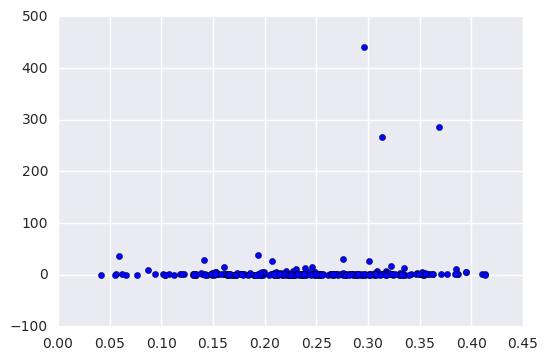

In [97]:
plt.scatter(np.mean(popcorr_bins,axis=1),np.abs(dg_early_peak.cv_dg-dg_late_peak.cv_dg))
scipy.stats.pearsonr(np.mean(popcorr_bins,axis=1),np.abs(dg_early_peak.cv_dg-dg_late_peak.cv_dg))

In [106]:

preserved_mean_coupling = []
non_preserved_mean_coupling = []

popcorr_mean_v_std_stats = []
data_sets_passed = []

0.0174772027522
8 10


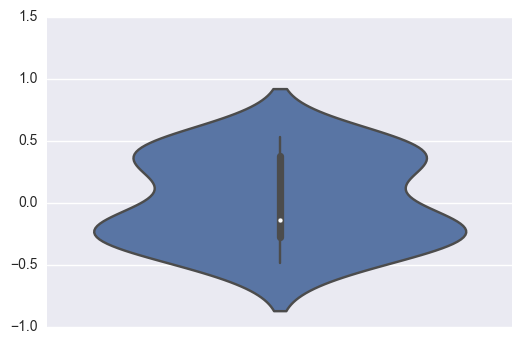

In [103]:
popcorr_mean_v_std_rval = [x[0] for x in popcorr_mean_v_std_stats]
popcorr_mean_v_std_pval = ([x[1] for x in popcorr_mean_v_std_stats])

sig_rval = []
sig_pval = []

pos_count = 0
neg_count = 0

for pval_idx in xrange(len(popcorr_mean_v_std_pval)):
    if np.abs(popcorr_mean_v_std_pval[pval_idx])<0.05:# and len(preserved_coupling_results[pval_idx]['ori_dg'][0])>100:
        sig_rval.append(popcorr_mean_v_std_rval[pval_idx])
        sig_pval.append(popcorr_mean_v_std_pval[pval_idx])

        pos_count += popcorr_mean_v_std_rval[pval_idx]>0
        neg_count += popcorr_mean_v_std_rval[pval_idx]<0

#plt.hist(sig_rval)
print np.mean(sig_rval)
print scipy.stats.ksone(sig_rval,0.0)

print pos_count, neg_count



sns.violinplot(np.array([sig_rval]),orient='v')
#sns.violinplot(np.array([sig_rval,[x*50 for x in sig_pval]]))#,orient='v')

#sns.boxplot?

In [28]:
preserved_coupling_results[0].keys()

['peak_dff_sg',
 'ptest_sg',
 'osi_sg',
 'phase_sg',
 'ori_sg',
 'osi',
 'vis',
 'sf_sg']

In [35]:
diff_ori_dg = []
diff_tf_dg = []

mean_popcorr_diff_ori_dg_diff = []

combined_popcorr_diff_ori = []
combined_popcorr_nodiff_ori = []

combined_popcorr_diff_tf = []
combined_popcorr_nodiff_tf = []

combined_popcorr_diff_vis= []
combined_popcorr_nodiff_vis = []

combined_popcorrs_mean = []
combined_popcorrs_std = []

combined_osi = []
combined_dsi = []
combined_vis = []

#for idx in [10]:
for idx in xrange(len(preserved_coupling_results)):

    if len(preserved_coupling_results[idx]['ori_dg'][0])>200:
        diff_ori_dg = np.abs(preserved_coupling_results[idx]['ori_dg'][0] - preserved_coupling_results[idx]['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['ori_dg'][0] - preserved_coupling_results[idx]['ori_dg'][1])<1
        
        diff_tf_dg = np.abs(preserved_coupling_results[idx]['tf_dg'][0] - preserved_coupling_results[idx]['tf_dg'][1])>0
        nodiff_tf_dg = np.abs(preserved_coupling_results[idx]['tf_dg'][0] - preserved_coupling_results[idx]['tf_dg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results[idx],axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results[idx],axis=1)))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results[idx],axis=1)))
        
        combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_tf_dg>0)]))
        combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(preserved_coupling_results[idx]['osi_dg'][0]))
        combined_dsi.extend(list(preserved_coupling_results[idx]['dsi_dg'][0]))
        combined_vis.extend(list(preserved_coupling_results[idx]['vis'][0]))

        #print stats.ttest_ind(np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)])

Ks_2sampResult(statistic=0.91999999999999993, pvalue=1.0685158220933416e-205)
(0.1893050913869079, 7.8227894371319394e-06)
(0.16294068065319456, 0.00012389706057199662)


(-3, 10)

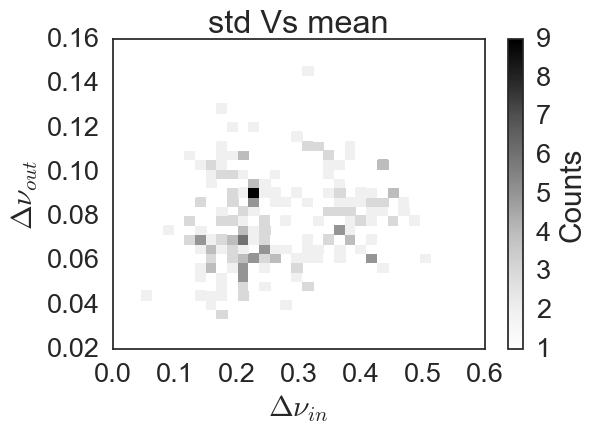

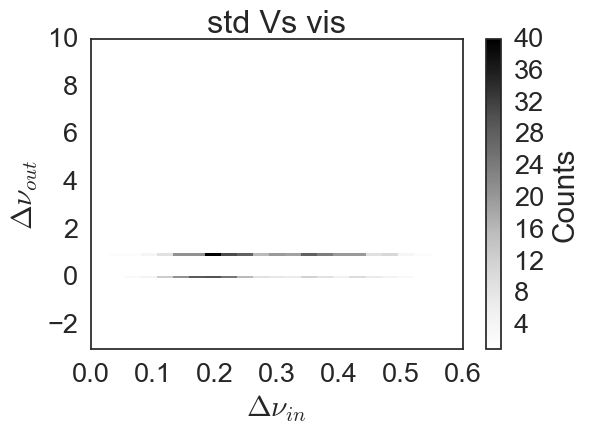

In [42]:
#plt.scatter(combined_popcorrs_mean,combined_popcorrs_std)
print stats.ks_2samp(combined_popcorrs_mean,combined_popcorrs_std)
print stats.pearsonr(combined_popcorrs_mean,combined_popcorrs_std)

import pylab
def plot_2Dhist(x,y,nbins,label_passed):
    H, xedges, yedges = pylab.histogram2d(x,y,bins=nbins)
    # H needs to be rotated and flipped
    H = pylab.rot90(H)
    H = pylab.flipud(H)
    # Mask zeros
    Hmasked = pylab.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    # Plot 2D histogram using pcolor
    pylab.figure()
    pylab.pcolormesh(xedges,yedges,Hmasked,label=label_passed)
    pylab.title(label_passed)
    pylab.xlabel(r'$\Delta \nu_{in}$')
    pylab.ylabel(r'$\Delta \nu_{out}$')
    cbar = pylab.colorbar()
    cbar.ax.set_ylabel('Counts')
    
plot_2Dhist(combined_popcorrs_mean,combined_popcorrs_std,30,'std Vs mean')


print stats.pearsonr(combined_popcorrs_mean,combined_vis)
plot_2Dhist(combined_popcorrs_mean,combined_vis,20,'std Vs vis')
plt.ylim(-3,10)

In [196]:
data_files = os.listdir('/media/ysweeney/HDD/ABI_data/boc/ophys_experiment_data/')

Ks_2sampResult(statistic=0.05137886114239032, pvalue=0.32439796612576322)
Ks_2sampResult(statistic=0.047489455003729364, pvalue=0.33803789854837518)
0.00985958617462
0.0305552395429
0.439964157706
0.400410677618


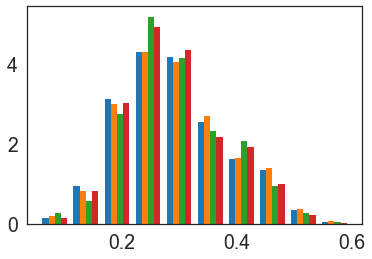

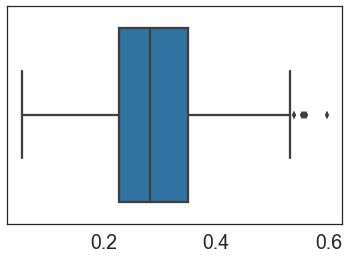

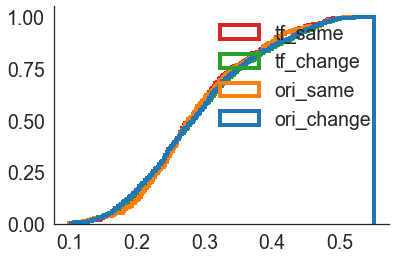

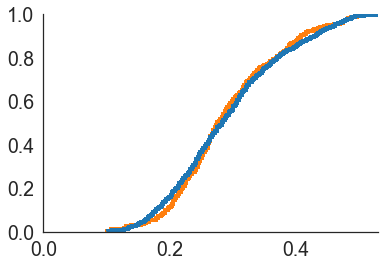

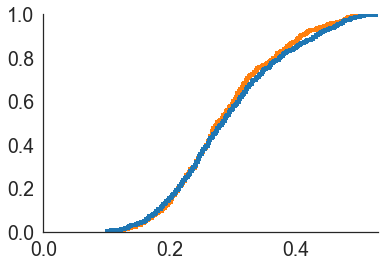

In [38]:
import pandas

sns.set_context('talk',font_scale=1.5)
sns.set_style('white')

plt.hist([combined_popcorr_diff_ori,combined_popcorr_diff_tf,combined_popcorr_nodiff_ori,combined_popcorr_nodiff_tf],normed=True)

d = {'diff_ori':combined_popcorr_diff_ori,'nodiff_ori':combined_popcorr_nodiff_ori,'diff_tf':combined_popcorr_diff_tf,'nodiff_tf':combined_popcorr_nodiff_tf,'diff_vis':combined_popcorr_diff_vis,'nodiff_vis':combined_popcorr_nodiff_vis}
combined_popcorr_data =  pandas.DataFrame(dict([ (k,pandas.Series(v)) for k,v in d.iteritems() ]))

plt.figure()
sns.boxplot(combined_popcorr_data)
print stats.ks_2samp(np.array(combined_popcorr_diff_ori),np.array(combined_popcorr_nodiff_ori))
print stats.ks_2samp(combined_popcorr_diff_tf,combined_popcorr_nodiff_tf)
print (np.mean(combined_popcorr_diff_ori)-np.mean(combined_popcorr_nodiff_ori))/(np.std(combined_popcorr_diff_ori)+np.std(combined_popcorr_nodiff_ori))
print (np.mean(combined_popcorr_diff_tf)-np.mean(combined_popcorr_nodiff_tf))/(np.std(combined_popcorr_diff_tf)+np.std(combined_popcorr_nodiff_tf))

plt.figure()
plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori,combined_popcorr_diff_tf,combined_popcorr_nodiff_tf],range=(0.1,0.55),label=['ori_change','ori_same','tf_change','tf_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
plt.legend()
sns.despine()


plt.figure()
plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori],range=(0.1,0.55),label=['ori_change','ori_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
#plt.legend()
plt.xlim(0,0.53)
plt.ylim(0,1.0)

sns.despine()


plt.figure()
plt.hist([combined_popcorr_diff_tf,combined_popcorr_nodiff_tf],range=(0.1,0.55),label=['tf_change','tf_same'],cumulative=True,normed=True,histtype='step',bins=200,lw=4)
#plt.legend()
plt.xlim(0,0.53)
plt.ylim(0,1.0)
sns.despine()

print np.sum(np.array(combined_popcorr_diff_ori)>0.3)/float(len(combined_popcorr_diff_ori))
print np.sum(np.array(combined_popcorr_nodiff_ori)>0.3)/float(len(combined_popcorr_nodiff_ori))

In [730]:
plt.hist([np.mean(popcorr_bins_results[1],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[1],axis=1)[np.where(diff_ori_dg>0)]])
print stats.ttest_ind(np.mean(popcorr_bins_results[0],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[0],axis=1)[np.where(diff_ori_dg>0)])

IndexError: index 296 is out of bounds for axis 1 with size 295

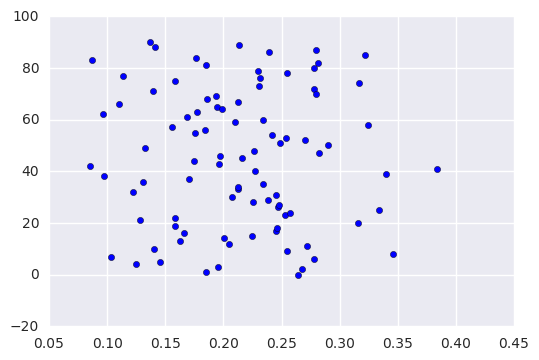

In [517]:
plt.scatter(np.mean(popcorr_bins_results[idx],axis=1),np.argsort(np.mean(popcorr_bins_results[idx],axis=1)))

In [546]:
print np.mean(popcorr_bins_results[idx],axis=1)[0],np.mean(popcorr_bins_results[idx],axis=1)[1],np.mean(popcorr_bins_results[idx],axis=1)[2]
print np.argsort(np.mean(popcorr_bins_results[idx],axis=1),axis=0)[0], np.argsort(np.mean(popcorr_bins_results[idx],axis=1),axis=0)[1], np.argsort(np.mean(popcorr_bins_results[idx],axis=1),axis=0)[2]

0.158170369611 0.162928630029 0.245443064296
22 13 17


In [25]:
import sys
sys.path.append('/home/ysweeney/Dropbox/notebooks/')
import py_scripts_yann

py_scripts_yann.save_pickle_safe('ABI_sweep_results_all_static_and_drifting_gratings_halfpoprate_corr_greater_p8.pkl',{'preserved_coupling_results': preserved_coupling_results,
'popcorr_bins_results': popcorr_bins_results, 'popcorr_mean_v_std_stats': popcorr_mean_v_std_stats})

Pickling the results in the location ABI_sweep_results_all_static_and_drifting_gratings_halfpoprate_corr_greater_p8_0.pkl.


'ABI_sweep_results_all_static_and_drifting_gratings_halfpoprate_corr_greater_p8_0.pkl'

In [10]:
import py_scripts_yann
import pickle

#res = pickle.load(open('ABI_sweep_results_all_static_gratings.pkl',encoding='iso'))

res = py_scripts_yann.load_pickle('ABI_sweep_results_all_static_gratings.pkl')
preserved_coupling_results = res['preserved_coupling_results']
popcorr_bins_results = res['popcorr_bins_results']
popcorr_mean_v_std_stats = res['popcorr_mean_v_std_stats']



LookupError: unknown encoding: iso

In [82]:
data_set = boc.get_ophys_experiment_data(524848692)
reload(StaticGratings_yann)
sg = StaticGratings_yann.StaticGratings_yann(data_set)


KeyboardInterrupt: 

In [79]:
sg_peak = sg.get_peak(0 ,20000)

In [60]:
sg_peak.

array([ 0.        ,  0.02      ,  0.04      ,  0.08      ,  0.16      ,
        0.31999999], dtype=float32)

0 drifting_gratings
1 natural_movie_one
2 natural_movie_three
3 spontaneous


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

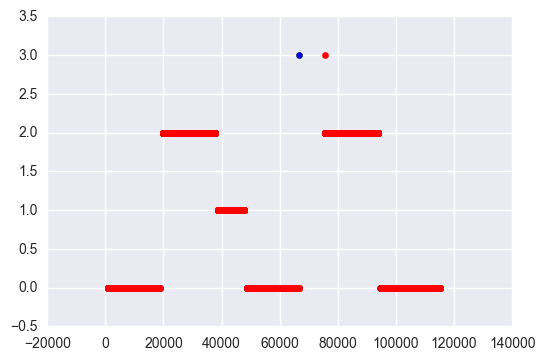

In [141]:
build_stim_history_from_dataset(data_set)


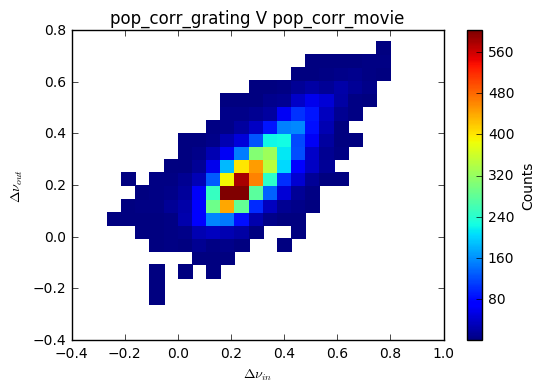

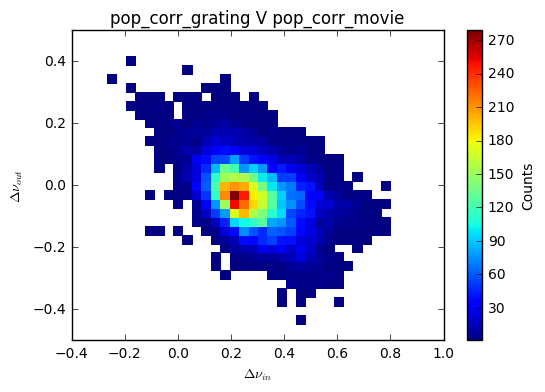

In [16]:
combined_popcorrs_mean_grating = []
combined_popcorrs_mean_movie = []

grating_bin_idx = [0,1,5,10,11]
movie_bin_idx = [2,3,7,8]

for idx in xrange(len(preserved_coupling_results)):
    if len(preserved_coupling_results[idx]['ori_dg'][0])>100:
        combined_popcorrs_mean_grating.extend(np.mean(popcorr_bins_results[idx][:,grating_bin_idx],axis=1))
        combined_popcorrs_mean_movie.extend(np.mean(popcorr_bins_results[idx][:,movie_bin_idx],axis=1))

plot_2Dhist(combined_popcorrs_mean_grating,combined_popcorrs_mean_movie,20,'pop_corr_grating V pop_corr_movie')
plot_2Dhist(combined_popcorrs_mean_grating,(np.array(combined_popcorrs_mean_movie)-np.array(combined_popcorrs_mean_grating)),30,'pop_corr_grating V pop_corr_movie')


43


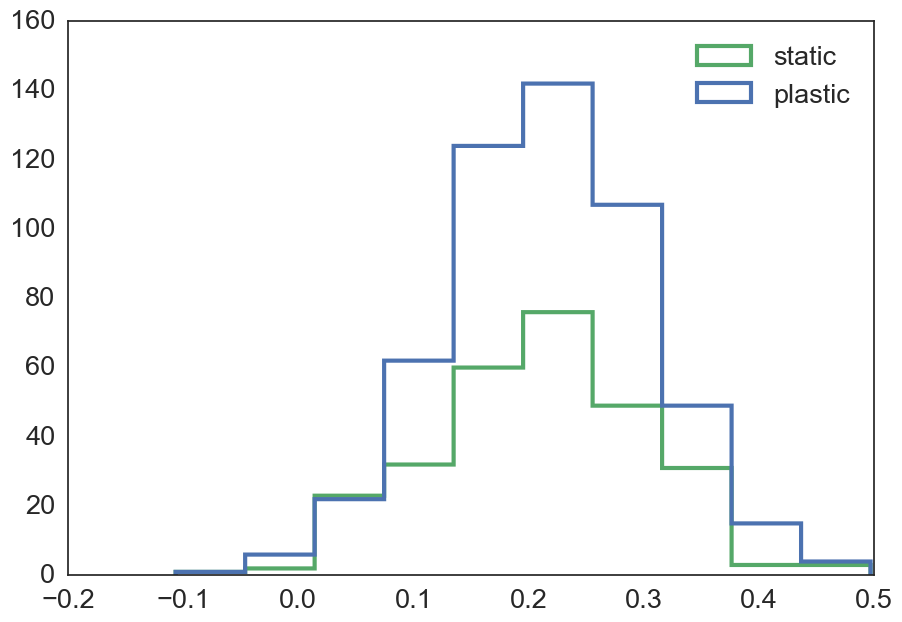

In [67]:
for idx in [43]:
    print idx
    if len(preserved_coupling_results[idx]['ori_dg'][0])>100:
        diff_ori_dg = np.abs(preserved_coupling_results[idx]['ori_dg'][0] - preserved_coupling_results[idx]['ori_dg'][1])>0
        nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['ori_dg'][0] - preserved_coupling_results[idx]['ori_dg'][1])<1
        
        diff_tf_dg = np.abs(preserved_coupling_results[idx]['tf_dg'][0] - preserved_coupling_results[idx]['tf_dg'][1])>0
        nodiff_tf_dg = np.abs(preserved_coupling_results[idx]['tf_dg'][0] - preserved_coupling_results[idx]['tf_dg'][1])<1
        #diff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])>0.4
        #nodiff_ori_dg = np.abs(preserved_coupling_results[idx]['dsi_dg'][0] - preserved_coupling_results[idx]['dsi_dg'][1])<0.4
        #plt.hist([np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)],np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]])
        
        #combined_popcorr_nodiff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).intersection(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])))])
        #combined_popcorr_diff_vis.extend(np.mean(popcorr_bins,axis=1)[list(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0])).union(set(np.where(preserved_coupling_results[idx]['vis'][1]>0)[0]).difference(set(np.where(preserved_coupling_results[idx]['vis'][0]>0)[0]))))])
        
        popcorr_bins_sorted = np.argsort(np.mean(popcorr_bins_results[idx],axis=1))
        
        combined_popcorr_nodiff_ori.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_ori_dg>0)]))
        combined_popcorr_diff_ori.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_ori_dg>0)]))

        combined_popcorrs_mean.extend(list(np.mean(popcorr_bins_results[idx],axis=1)))
        combined_popcorrs_std.extend(list(np.std(popcorr_bins_results[idx],axis=1)))
        
        combined_popcorr_diff_tf.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(diff_tf_dg>0)]))
        combined_popcorr_nodiff_tf.extend(list(np.mean(popcorr_bins_results[idx],axis=1)[np.where(nodiff_tf_dg>0)]))
        
        combined_osi.extend(list(preserved_coupling_results[idx]['osi_dg'][0]))
        combined_dsi.extend(list(preserved_coupling_results[idx]['dsi_dg'][0]))
        combined_vis.extend(list(preserved_coupling_results[idx]['vis'][0]))

plt.hist([combined_popcorr_diff_ori,combined_popcorr_nodiff_ori],histtype='step',lw=3,label=['plastic','static'])
plt.legend()

In [1]:
print np.sum(np.array(combined_popcorr_diff_ori)>0.3)/float(len(combined_popcorr_diff_ori))
print np.sum(np.array(combined_popcorr_nodiff_ori)>0.3)/float(len(combined_popcorr_nodiff_ori))
print (np.mean(combined_popcorr_diff_tf))
print (np.mean(combined_popcorr_nodiff_tf))

NameError: name 'np' is not defined

(0.8904869, 0.0)


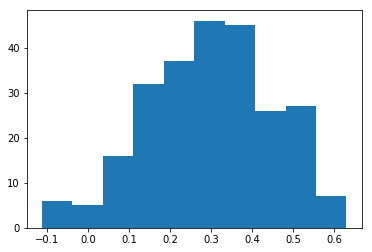

In [81]:
_, dff_traces = data_set.get_corrected_fluorescence_traces(cell_specimen_ids=data_set.get_cell_specimen_ids()[:])
#dff_traces = dff_traces[:,:5000]

dff_means = np.mean(dff_traces,axis=1)
pop_avg = np.mean(dff_traces,axis=0)

dff_norms = dff_traces.copy()
for i in xrange(dff_means.shape[0]):
    dff_norms[i,:] = dff_traces[i,:]-dff_means[i]

pop_avg_norm = np.mean(dff_norms,axis=0)

#dff_traces = dff_norms.copy()
    
corr_coeff = np.corrcoef(dff_traces)

pop_corr = np.zeros(corr_coeff.shape[0])
    #np.random.shuffle(pop_avg)

popcorr_1st_half = np.zeros(corr_coeff.shape[0])
popcorr_2nd_half = np.zeros(corr_coeff.shape[0])

N_pop = dff_traces.shape[0]
print scipy.stats.pearsonr(np.mean(dff_traces[:int(N_pop*0.5),:],axis=0),np.mean(dff_traces[int(N_pop*0.5):,:],axis=0))
        
for i in xrange(corr_coeff.shape[0]):
    weights = np.ones(corr_coeff.shape[0])
    weights[i] = 0
    pop_avg_norm = np.ma.average(dff_norms,weights=weights,axis=0)

    pop_corr[i] = np.corrcoef(dff_traces[i,:],pop_avg_norm)[0][1]
    #pop_corr[i] = np.dot(dff_traces[i,:],pop_avg_norm)/np.std(dff_traces[i,:])
    
plt.hist(pop_corr)
plt.show()

pearson = pop_corr.copy()

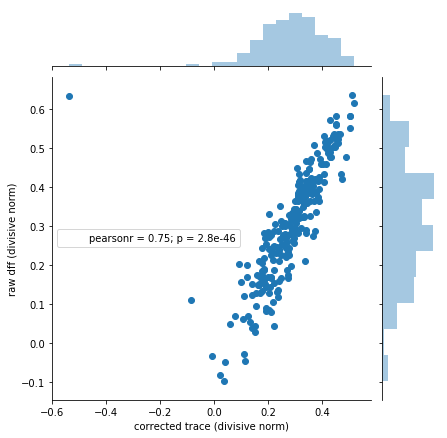

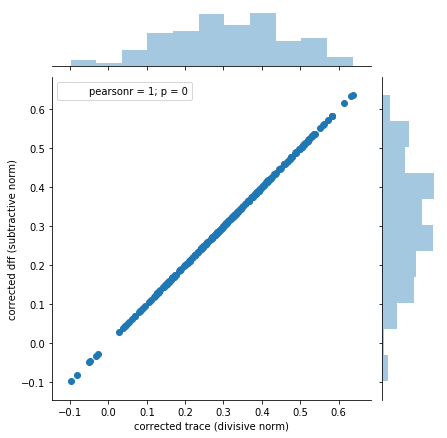

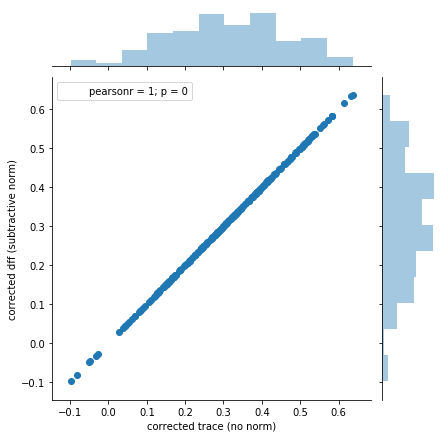

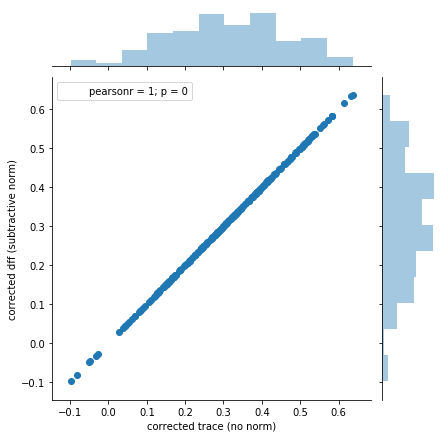

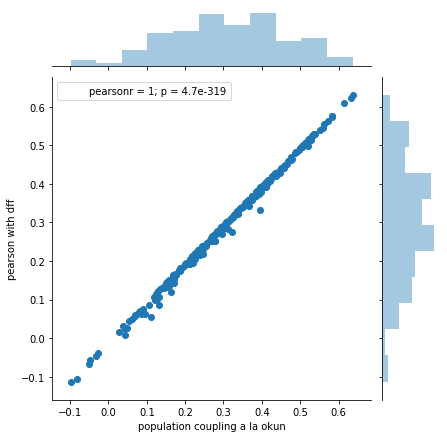

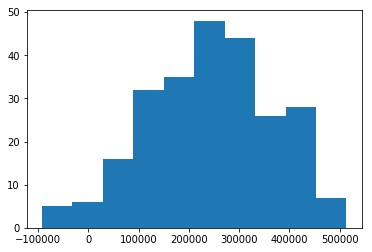

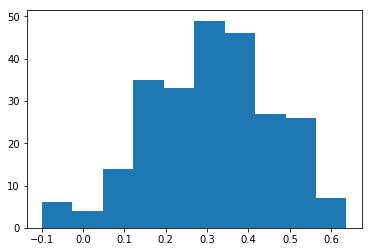

In [83]:
g = sns.jointplot(popcorr_dff,popcorr_corrected)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(ylabel='raw dff (divisive norm)',xlabel='corrected trace (divisive norm)')
plt.show()

g = sns.jointplot(popcorr_corrected_subtract_norm,popcorr_corrected)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(ylabel='corrected dff (subtractive norm)',xlabel='corrected trace (divisive norm)')
plt.show()

g = sns.jointplot(popcorr_corrected_subtract_norm,popcorr_corrected_no_norm)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(ylabel='corrected dff (subtractive norm)',xlabel='corrected trace (no norm)')
plt.show()

g = sns.jointplot(popcorr_corrected_popnorm,popcorr_corrected_nopopnorm)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(ylabel='corrected dff (subtractive norm)',xlabel='corrected trace (no norm)')
plt.show()

g = sns.jointplot(popcorr_corrected_no_norm,popcoupling)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(ylabel='pearson with dff',xlabel='population coupling a la okun')
plt.show()

plt.hist(popcoupling)
plt.show()

plt.hist(popcorr_corrected_no_norm)
plt.show()

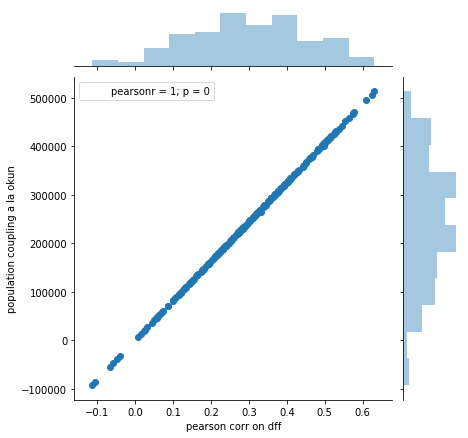

In [82]:
g = sns.jointplot(pearson,popcoupling)#,ylabel='raw dff',xlabel='corrected trace')
g.set_axis_labels(xlabel='pearson corr on dff',ylabel='population coupling a la okun')
plt.show()



In [92]:
len(visp_ecs)

for exp_id in visp_ecs:
    print exp_id['id']
    exp = boc.get_ophys_experiments(experiment_container_ids=[ exp_id['id']], 
                                stimuli=[stim_info.STATIC_GRATINGS])[0]
    try:
        data_set = boc.get_ophys_experiment_data(exp_id['id'])
    except:
        print 'fail'

511510911
fail
530739574
fail
511510736
fail
528792730
fail
511507144
fail
528889127
fail
511510667
fail
511510855
fail
561312433
fail
512124562
fail
555040113
fail
511510675
fail
540168835
fail
517328083
fail
524691282
fail
546724786
fail
528799602
fail
531100608
fail
536323956
fail
511509529
fail
511510758
fail
538803515
fail
511510670
fail
527550471
fail
511510955
fail
531823088
fail
545578995
fail
511507650
fail
529763300
fail
511507811
fail
529770662
fail
528959519
fail
511510699
fail
511506664
fail
511510884
fail
532233174
fail
535575493
fail
540993888
fail
511510896
fail
511510650
fail
539291370
fail
511498742
fail
569811199
fail
511510927
fail
543677425
fail
571137444
fail
531134088
fail
530243910
fail
526481129
fail
570278595
fail
511510718
fail
511510989
fail
527676429
fail
511510779
fail


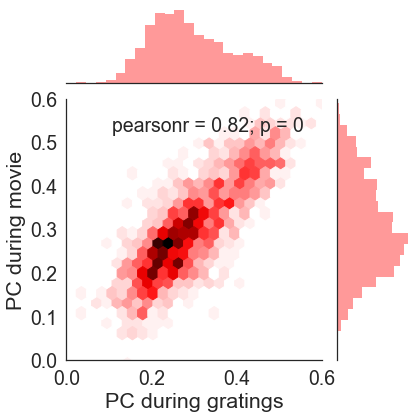

In [208]:
combined_popcorrs_mean_grating = []
combined_popcorrs_mean_movie = []

grating_bin_idx = [0,1,5,10,11]
movie_bin_idx = [2,3,7,8]

for idx in xrange(len(preserved_coupling_results)):
    if len(preserved_coupling_results[idx]['ori_sg'][0])>100:
        combined_popcorrs_mean_grating.extend(np.mean(popcorr_bins_results[idx][:,grating_bin_idx],axis=1))
        combined_popcorrs_mean_movie.extend(np.mean(popcorr_bins_results[idx][:,movie_bin_idx],axis=1))

g = sns.jointplot(np.array(combined_popcorrs_mean_grating),np.array(combined_popcorrs_mean_movie),ratio=3,xlim=(0,0.6),ylim=(0,0.6),kind='hexbin',color='r')
g.ax_joint.set_xlabel('PC during gratings')
g.ax_joint.set_ylabel('PC during movie')
plt.savefig('/home/ysweeney/repos/topdown_learning/manuscript/figures/PC_movie_V_grating.png',dpi=600)
#plt.ylim(0,0.6)
#plot_2Dhist(combined_popcorrs_mean_grating,(np.array(combined_popcorrs_mean_movie)-np.array(combined_popcorrs_mean_grating)),30,'pop_corr_grating V pop_corr_movie')
